In [98]:
#!pip install zipcodes

In [99]:
#pip install --upgrade scikit-learn

In [100]:
### IMPORT: ------------------------------------
import scipy.stats as stats 
import pandas as pd
import numpy as np
import zipcodes as zcode # to get zipcodes

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

import statsmodels.api as sm
#--Sklearn library--
# Sklearn package's randomized data splitting function
from sklearn.model_selection import train_test_split 

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay #to plot confusion matric
#from sklearn.metrics import plot_confusion_matrix

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier#to build the model

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth',400)

# To supress numerical display in scientific notations
warnings.filterwarnings('ignore') # To supress warnings
 # set the background for the graphs
plt.style.use('ggplot')

In [101]:
#Reading the csv file  used car data.csv 
data_path=r'C:\Users\dell\OneDrive\Desktop\Data Science Related\Logistic Regression\Bank_Personal_Loan_Modelling.csv'
df=pd.read_csv(data_path)
df_loan=df.copy()
print(f'There are {df_loan.shape[0]} rows and {df_loan.shape[1]} columns') # fstring 

There are 5000 rows and 14 columns


In [102]:
df_loan.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4  1.600          1         0   
1   2   45          19      34     90089       3  1.500          1         0   
2   3   39          15      11     94720       1  1.000          1         0   
3   4   35           9     100     94112       1  2.700          2         0   
4   5   35           8      45     91330       4  1.000          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [103]:
#get the size of dataframe
print ("Rows     : " , df_loan.shape[0])  #get number of rows/observations
print ("Columns  : " , df_loan.shape[1]) #get number of columns
print ("#"*40,"\n","Features : \n\n", df_loan.columns.tolist()) #get name of columns/features
print ("#"*40,"\nMissing values :\n\n", df_loan.isnull().sum().sort_values(ascending=False))
print( "#"*40,"\nPercent of missing :\n\n", round(df_loan.isna().sum() / df_loan.isna().count() * 100, 2)) # looking at columns with most Missing Values
print ("#"*40,"\nUnique values :  \n\n", df_loan.nunique())  #  count of unique values

Rows     :  5000
Columns  :  14
######################################## 
 Features : 

 ['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
######################################## 
Missing values :

 ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64
######################################## 
Percent of missing :

 ID                   0.000
Age                  0.000
Experience           0.000
Income               0.000
ZIP Code             0.000
Family               0.000
CCAvg                0.000
Education            0.000
Mortgage             0.000
Personal Loan        0

In [104]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


There are no missing values in the dataset. All the columns are numerical here. Personal loan is target variable. Zipcode,Family,Education,Securities Account,CD_account,online,Credit card are all categorical variables.

In [105]:
df_loan.sample(10)

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
1851  1852   34           8      60     94015       4  2.200          2   
889    890   24          -2      82     91103       2  1.600          3   
59      60   31           5     188     91320       2  4.500          1   
4716  4717   60          34      83     95616       2  1.400          1   
1482  1483   60          35       8     94143       1  0.100          1   
1453  1454   29           5      85     90232       3  2.500          1   
4455  4456   56          31      28     94040       1  1.500          2   
3200  3201   48          23      70     92122       1  2.800          2   
4530  4531   33           9      19     95370       2  1.000          2   
3756  3757   35          11      83     92122       2  2.200          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
1851         0              0                   0           0       0   
889          0              0                   0           0       1   
59         455              0                   0           0       0   
4716        75              0                   1           0       1   
1482         0              0                   0           0       1   
1453         0              0                   0           0       1   
4455         0              0                   1           1       1   
3200         0              0                   0           0       0   
4530        92              0                   0           0       1   
3756         0              0                   0           0       0   

      CreditCard  
1851           1  
889            1  
59             0  
4716           0  
1482           0  
1453           1  
4455           1  
3200           0  
4530           0  
3756           0

In [106]:
df_loan.drop(['ID'],axis=1,inplace=True)

In [107]:
df_loan.rename(columns={"ZIP Code":"ZIPCode","Personal Loan":"PersonalLoan",
                        "Securities Account":"SecuritiesAccount","CD Account":'CDAccount'},inplace=True)

Processing Zipcode

Zipcode is a categorical feature and can be a good predictor of target variable. We can analyse if there is any pattern on location for customers who had borrowed loaned during previous campaign. Trying to see if we can reduce the category

In [108]:
df_loan.ZIPCode.nunique()

467

In [109]:
# get unique zipcodes
list_zipcode=df_loan.ZIPCode.unique()

In [110]:
#here i am creating a dictionary of county by using library zipcode and matching method.
dict_zip={}
for zipcode in list_zipcode:
    my_city_county = zcode.matching(zipcode.astype('str'))
    if len(my_city_county)==1: # if  zipcode is present then get county else, assign zipcode to county
        county=my_city_county[0].get('county')
    else:
        county=zipcode
    
    dict_zip.update({zipcode:county})

In [111]:
dict_zip

{91107: 'Los Angeles County',
 90089: 'Los Angeles County',
 94720: 'Alameda County',
 94112: 'San Francisco County',
 91330: 'Los Angeles County',
 92121: 'San Diego County',
 91711: 'Los Angeles County',
 93943: 'Monterey County',
 93023: 'Ventura County',
 94710: 'Alameda County',
 90277: 'Los Angeles County',
 93106: 'Santa Barbara County',
 94920: 'Marin County',
 91741: 'Los Angeles County',
 95054: 'Santa Clara County',
 95010: 'Santa Cruz County',
 94305: 'Santa Clara County',
 91604: 'Los Angeles County',
 94015: 'San Mateo County',
 90095: 'Los Angeles County',
 91320: 'Ventura County',
 95521: 'Humboldt County',
 95064: 'Santa Cruz County',
 90064: 'Los Angeles County',
 94539: 'Alameda County',
 94104: 'San Francisco County',
 94117: 'San Francisco County',
 94801: 'Contra Costa County',
 94035: 'Santa Clara County',
 92647: 'Orange County',
 95814: 'Sacramento County',
 94114: 'San Francisco County',
 94115: 'San Francisco County',
 92672: 'Orange County',
 94122: 'San Fra

We got almost all county expect for 96651,92634,93077,92717. We can fix this zip code by searching internet. Couldn't find for other zipcodes.

In [112]:
dict_zip.update({92717:'Orange County'})
dict_zip.update({92634:'Orange County'})

In [113]:
df_loan['Country']=df_loan['ZIPCode'].map(dict_zip)

In [114]:
df_loan.Country.nunique()

40

In [115]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                5000 non-null   int64  
 1   Experience         5000 non-null   int64  
 2   Income             5000 non-null   int64  
 3   ZIPCode            5000 non-null   int64  
 4   Family             5000 non-null   int64  
 5   CCAvg              5000 non-null   float64
 6   Education          5000 non-null   int64  
 7   Mortgage           5000 non-null   int64  
 8   PersonalLoan       5000 non-null   int64  
 9   SecuritiesAccount  5000 non-null   int64  
 10  CDAccount          5000 non-null   int64  
 11  Online             5000 non-null   int64  
 12  CreditCard         5000 non-null   int64  
 13  Country            5000 non-null   object 
dtypes: float64(1), int64(12), object(1)
memory usage: 547.0+ KB


Fixing the data types

Personal_Loan, Securities_Account, CD_Account, 'Online', 'CreditCard' ,Education are of int/object type, we can change them to category type to reduce the dataspace required.

In [116]:
# converting categorical variable to category type
category_col = ['PersonalLoan', 'SecuritiesAccount','Family', 'CDAccount', 'Online', 
                'CreditCard', 'ZIPCode', 'Education','Country']
df_loan[category_col] = df_loan[category_col].astype('category')

In [117]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                5000 non-null   int64   
 1   Experience         5000 non-null   int64   
 2   Income             5000 non-null   int64   
 3   ZIPCode            5000 non-null   category
 4   Family             5000 non-null   category
 5   CCAvg              5000 non-null   float64 
 6   Education          5000 non-null   category
 7   Mortgage           5000 non-null   int64   
 8   PersonalLoan       5000 non-null   category
 9   SecuritiesAccount  5000 non-null   category
 10  CDAccount          5000 non-null   category
 11  Online             5000 non-null   category
 12  CreditCard         5000 non-null   category
 13  Country            5000 non-null   category
dtypes: category(9), float64(1), int64(4)
memory usage: 266.4 KB


we can see that the memory usage has decreased from 547 to 266.

In [118]:
df_loan.groupby(['Age','Education'])['Experience'].describe().T

Age           23            24                   25                   26  \
Education      1      2      1      2      3      1      2      3      1   
count      7.000  5.000 13.000  8.000  7.000 23.000 11.000 19.000 30.000   
mean      -1.286 -2.200 -0.692 -0.875 -2.000  0.522 -0.273 -0.526  1.433   
std        0.756  0.447  0.947  0.641  1.000  0.790  0.647  0.697  0.817   
min       -3.000 -3.000 -2.000 -2.000 -3.000 -1.000 -1.000 -2.000  0.000   
25%       -1.000 -2.000 -2.000 -1.000 -2.500  0.000 -1.000 -1.000  1.000   
50%       -1.000 -2.000  0.000 -1.000 -2.000  1.000  0.000 -1.000  2.000   
75%       -1.000 -2.000  0.000 -0.750 -2.000  1.000  0.000  0.000  2.000   
max       -1.000 -2.000  0.000  0.000  0.000  1.000  1.000  1.000  2.000   

Age               ...     64     65                   66                   67  \
Education      2  ...      3      1      2      3      1      2      3      1   
count     24.000  ... 30.000 30.000 23.000 27.000  9.000  5.000 10.000  5.000   
mean       0.750  ... 38.533 39.867 40.087 39.519 41.111 41.400 40.400 41.600   
std        0.847  ...  1.756  0.730  0.733  1.553  0.333  0.548  1.647  0.894   
min       -1.000  ... 34.000 39.000 39.000 35.000 41.000 41.000 36.000 41.000   
25%        0.000  ... 38.000 39.000 40.000 39.000 41.000 41.000 40.250 41.000   
50%        1.000  ... 39.000 40.000 40.000 40.000 41.000 41.000 41.000 41.000   
75%        1.000  ... 40.000 40.000 41.000 41.000 41.000 42.000 41.000 42.000   
max        2.000  ... 40.000 41.000 41.000 41.000 42.000 42.000 42.000 43.000   

Age                      
Education      2      3  
count      3.000  4.000  
mean      42.667 41.500  
std        0.577  0.577  
min       42.000 41.000  
25%       42.500 41.000  
50%       43.000 41.500  
75%       43.000 42.000  
max       43.000 42.000  

[8 rows x 134 columns]

Its seems experience is negative for all observation with for age 23,24, 25 . Based on there age and education it seems values were negative by mistake. so changing it to absoulte values of experience.

In [119]:
df_loan.loc[df_loan['Experience']<0,'Experience']=np.abs(df_loan['Experience'])

In [120]:
df_loan[df_loan['Experience']==0]['Age'].describe()

count   66.000
mean    25.636
std      1.145
min     24.000
25%     25.000
50%     26.000
75%     26.000
max     30.000
Name: Age, dtype: float64

Checking age and income for customers with 0 experience. We will see how to impute this columns more after EDA.

In [121]:
df_loan.describe().T

count   mean     std    min    25%    50%     75%     max
Age        5000.000 45.338  11.463 23.000 35.000 45.000  55.000  67.000
Experience 5000.000 20.135  11.415  0.000 10.000 20.000  30.000  43.000
Income     5000.000 73.774  46.034  8.000 39.000 64.000  98.000 224.000
CCAvg      5000.000  1.938   1.748  0.000  0.700  1.500   2.500  10.000
Mortgage   5000.000 56.499 101.714  0.000  0.000  0.000 101.000 635.000

In [122]:
for column in category_col:
    print(df_loan[column].value_counts())
    print("#" * 40)

0    4520
1     480
Name: PersonalLoan, dtype: int64
########################################
0    4478
1     522
Name: SecuritiesAccount, dtype: int64
########################################
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
########################################
0    4698
1     302
Name: CDAccount, dtype: int64
########################################
1    2984
0    2016
Name: Online, dtype: int64
########################################
0    3530
1    1470
Name: CreditCard, dtype: int64
########################################
94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
94087      1
90813      1
94404      1
90068      1
9307       1
Name: ZIPCode, Length: 467, dtype: int64
########################################
1    2096
3    1501
2    1403
Name: Education, dtype: int64
########################################
Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda C

# Univariate Analysis

In [123]:
def dist_box(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    
    sns.set_theme(style="white")
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="violet",ax=ax_box)
    ax_box.set(xlabel='')
    
     # just trying to make visualisation better. This will set background to white
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    
    sns.distplot(data,kde=False,color='blue',ax=ax_dis)
    
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})

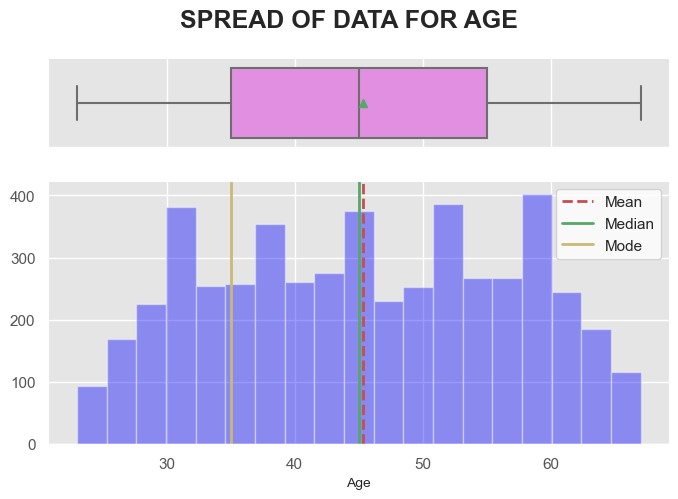

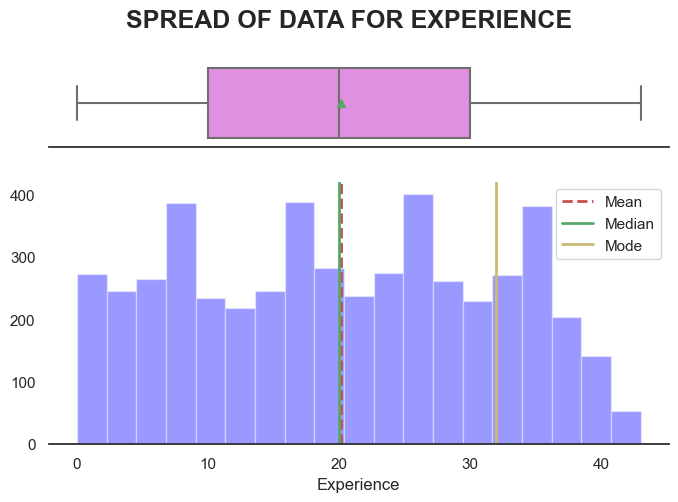

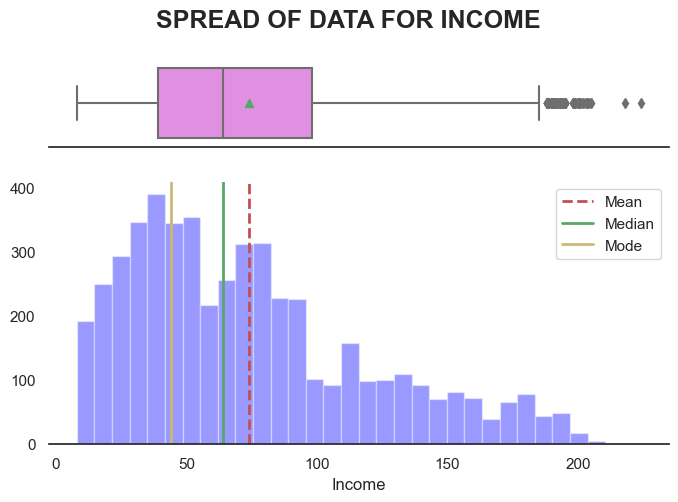

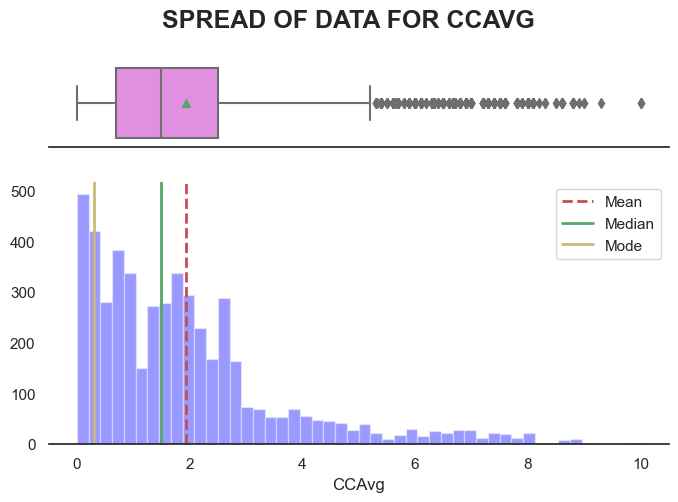

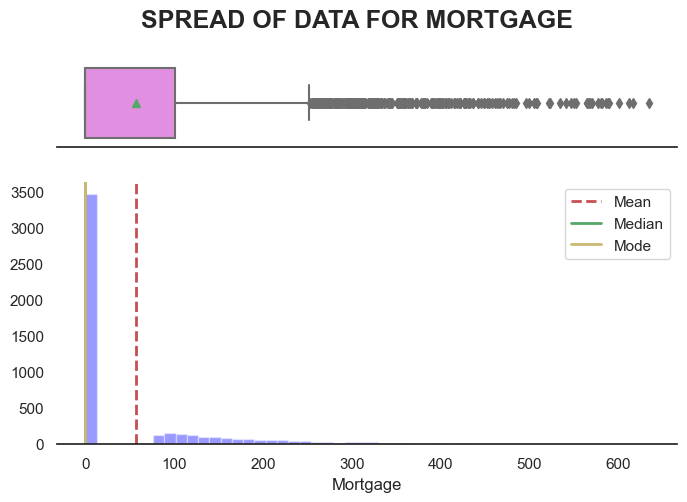

In [124]:
#select all quantitative columns for checking the spread
list_col=  ['Age','Experience','Income','CCAvg','Mortgage']
for i in range(len(list_col)):
    dist_box(df_loan[list_col[i]])

Age
Age can be a vital factor in borrowinng loan, converting ages to bin to explore if there is any pattern

In [125]:
df_loan['Agebin'] = pd.cut(df_loan['Age'], bins = [0, 30, 40, 50, 60, 100], labels = ['18-30', '31-40', '41-50', '51-60', '61-100'])

Income

To understand customers segments derving new columns which will help us identify if customer belongs to Upper , middle or lower income group

In [126]:
# Create a new variable - Income group

df_loan["Income_group"] = pd.cut(
    x=df["Income"],
    bins=[0, 50, 140, 224],
    labels=["Lower", "Middle", "High"],
)

Spending

To understand customers spending derving new columns which will say if customer belongs to Upper , middle or lower spending

In [127]:
df_loan.CCAvg.describe()

count   5000.000
mean       1.938
std        1.748
min        0.000
25%        0.700
50%        1.500
75%        2.500
max       10.000
Name: CCAvg, dtype: float64

In [128]:
df_loan["Spending_group"] = pd.cut( x=df_loan["CCAvg"], bins=[0.00000, 0.70000, 2.50000, 10.00000],
    labels=["Low", "Medium", "High"],include_lowest=True ,
)

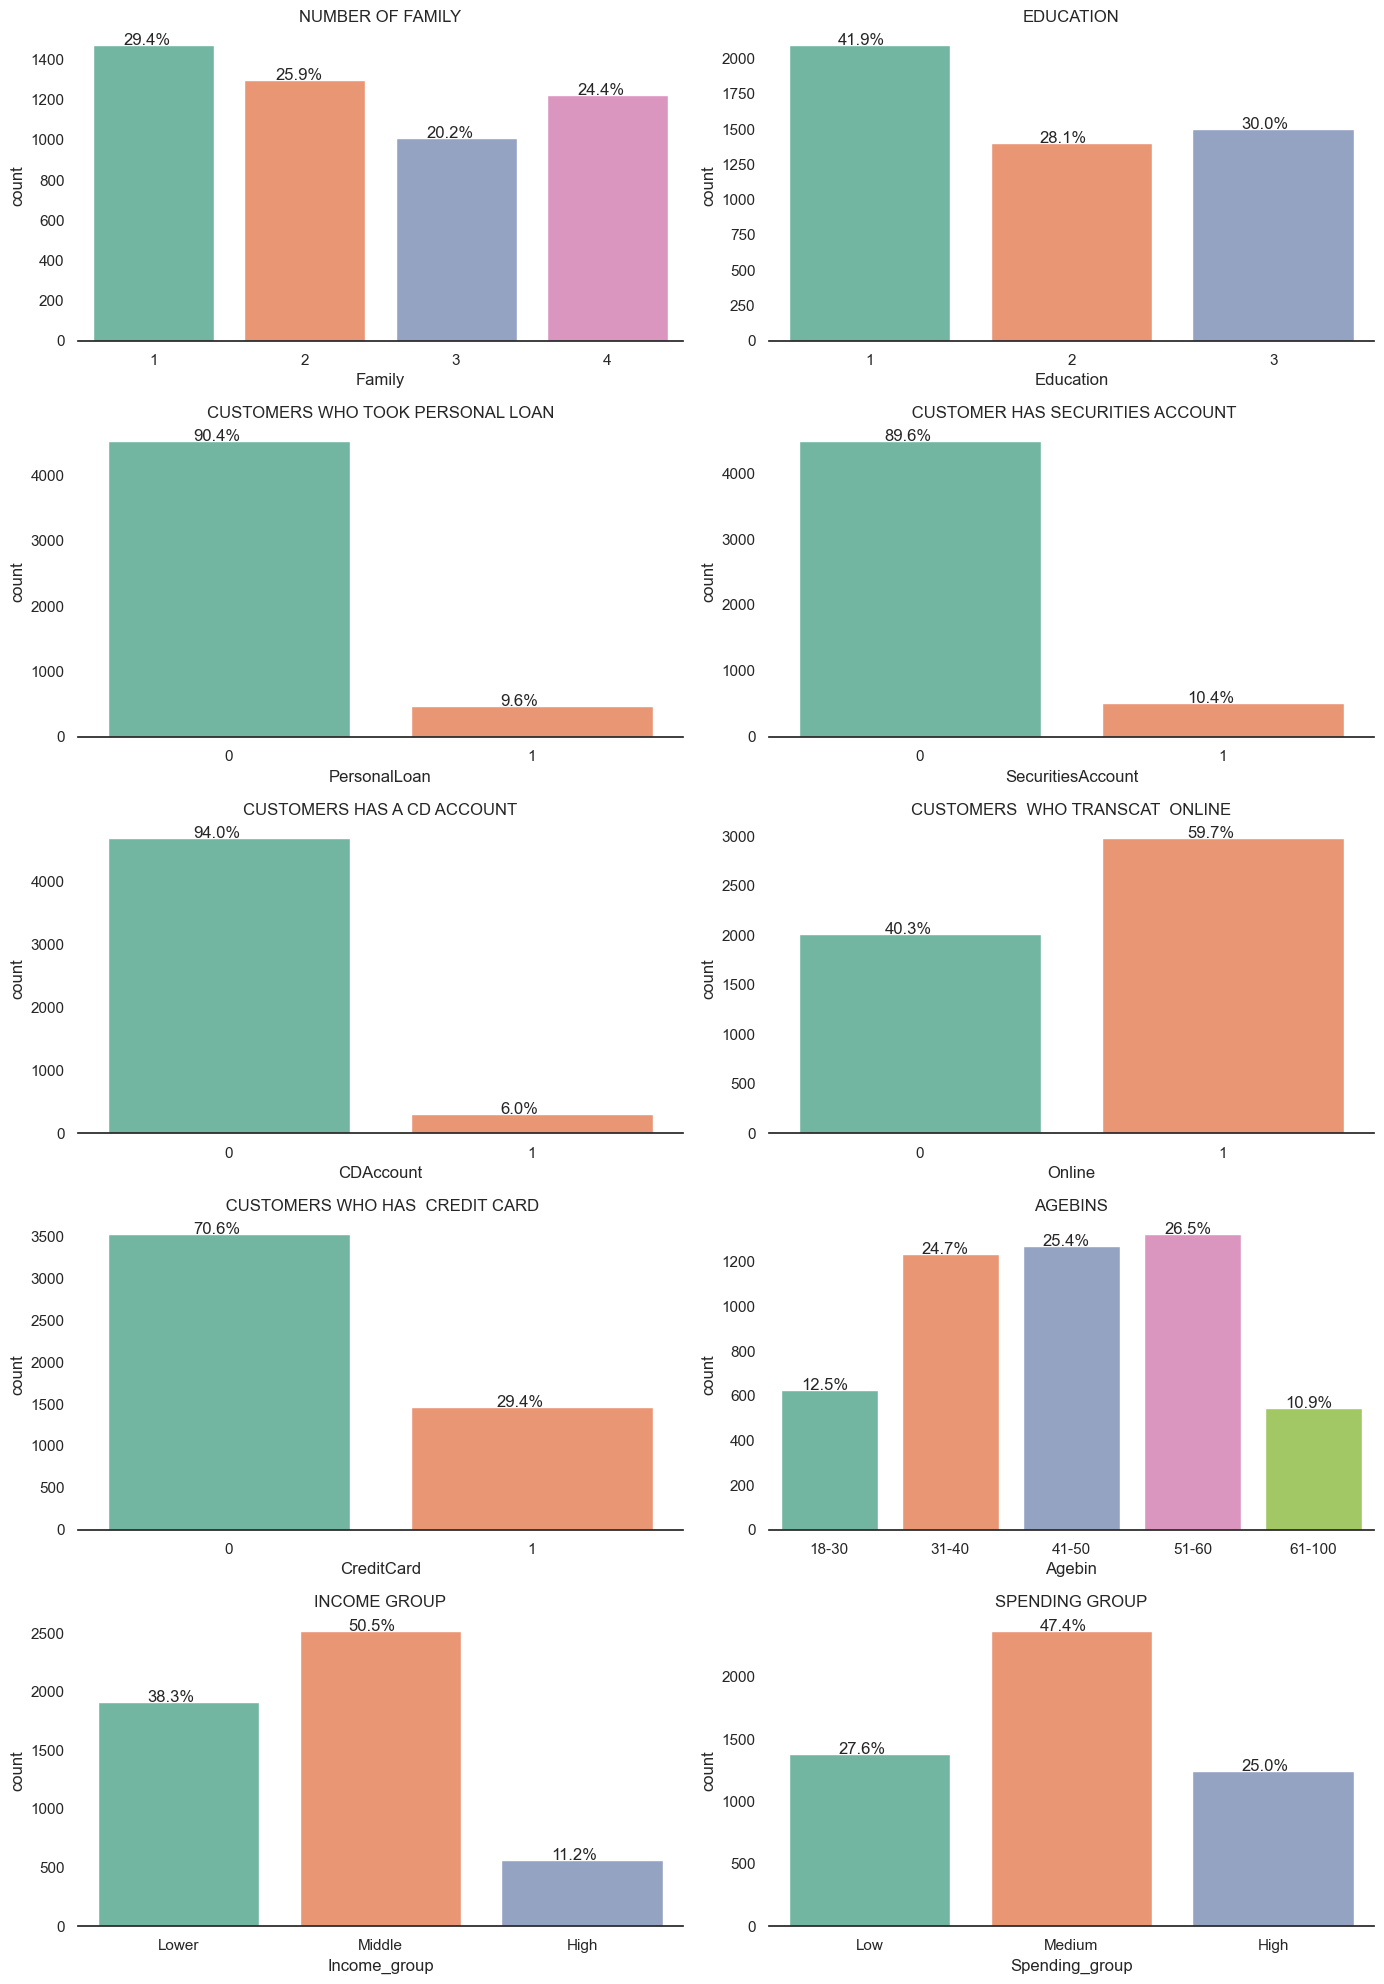

In [129]:
# Making a list of all categorical variables
cat_columns = ['Family','Education','PersonalLoan','SecuritiesAccount',
               'CDAccount','Online','CreditCard','Agebin','Income_group','Spending_group']

title=['Number of Family','Education','Customers who took Personal Loan',
       ' Customer has Securities Account','Customers has a CD Account',
       'Customers  who transcat  Online',' Customers who has  Credit Card','Agebins',"Income group",'Spending group']
plt.figure(figsize=(14,20))

sns.set_theme(style="white") # just trying to make visualisation better. This will set background to white
#list_palette=['Blues_r','Greens_r','Purples_r','Reds_r','Blues_r','Greens_r','Purples_r','Reds_r','Blues_r']

for i, variable in enumerate(cat_columns):
                     plt.subplot(5,2,i+1)
                     order = df_loan[variable].value_counts(ascending=False).index   
                     #sns.set_palette(list_palette[i]) # to set the palette
                     sns.set_palette('Set2')
                     ax=sns.countplot(x=df_loan[variable], data=df_loan )
                     sns.despine(top=True,right=True,left=True) # to remove side line from graph
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(df_loan[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.04
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.tight_layout()
                     plt.title(title[i].upper())
                                     

In [130]:
df_loan.groupby(['Country','PersonalLoan'])['PersonalLoan'].agg({'size'}).unstack()

size     
PersonalLoan              0    1
Country                         
9307                      1    0
96651                     6    0
Alameda County          456   44
Butte County             17    2
Contra Costa County      73   12
El Dorado County         16    1
Fresno County            24    2
Humboldt County          30    2
Imperial County           3    0
Kern County              47    7
Lake County               4    0
Los Angeles County      984  111
Marin County             48    6
Mendocino County          7    1
Merced County             4    0
Monterey County         113   15
Napa County               3    0
Orange County           333   33
Placer County            22    2
Riverside County         50    6
Sacramento County       169   15
San Benito County        14    0
San Bernardino County    98    3
San Diego County        509   59
San Francisco County    238   19
San Joaquin County       12    1
San Luis Obispo County   28    5
San Mateo County        192   12
Santa Barbara County    143   11
Santa Clara County      492   71
Santa Cruz County        60    8
Shasta County            15    3
Siskiyou County           7    0
Solano County            30    3
Sonoma County            22    6
Stanislaus County        14    1
Trinity County            4    0
Tuolumne County           7    0
Ventura County          103   11
Yolo County             122    8

<Axes: ylabel='Country'>

<Figure size 1500x2400 with 0 Axes>

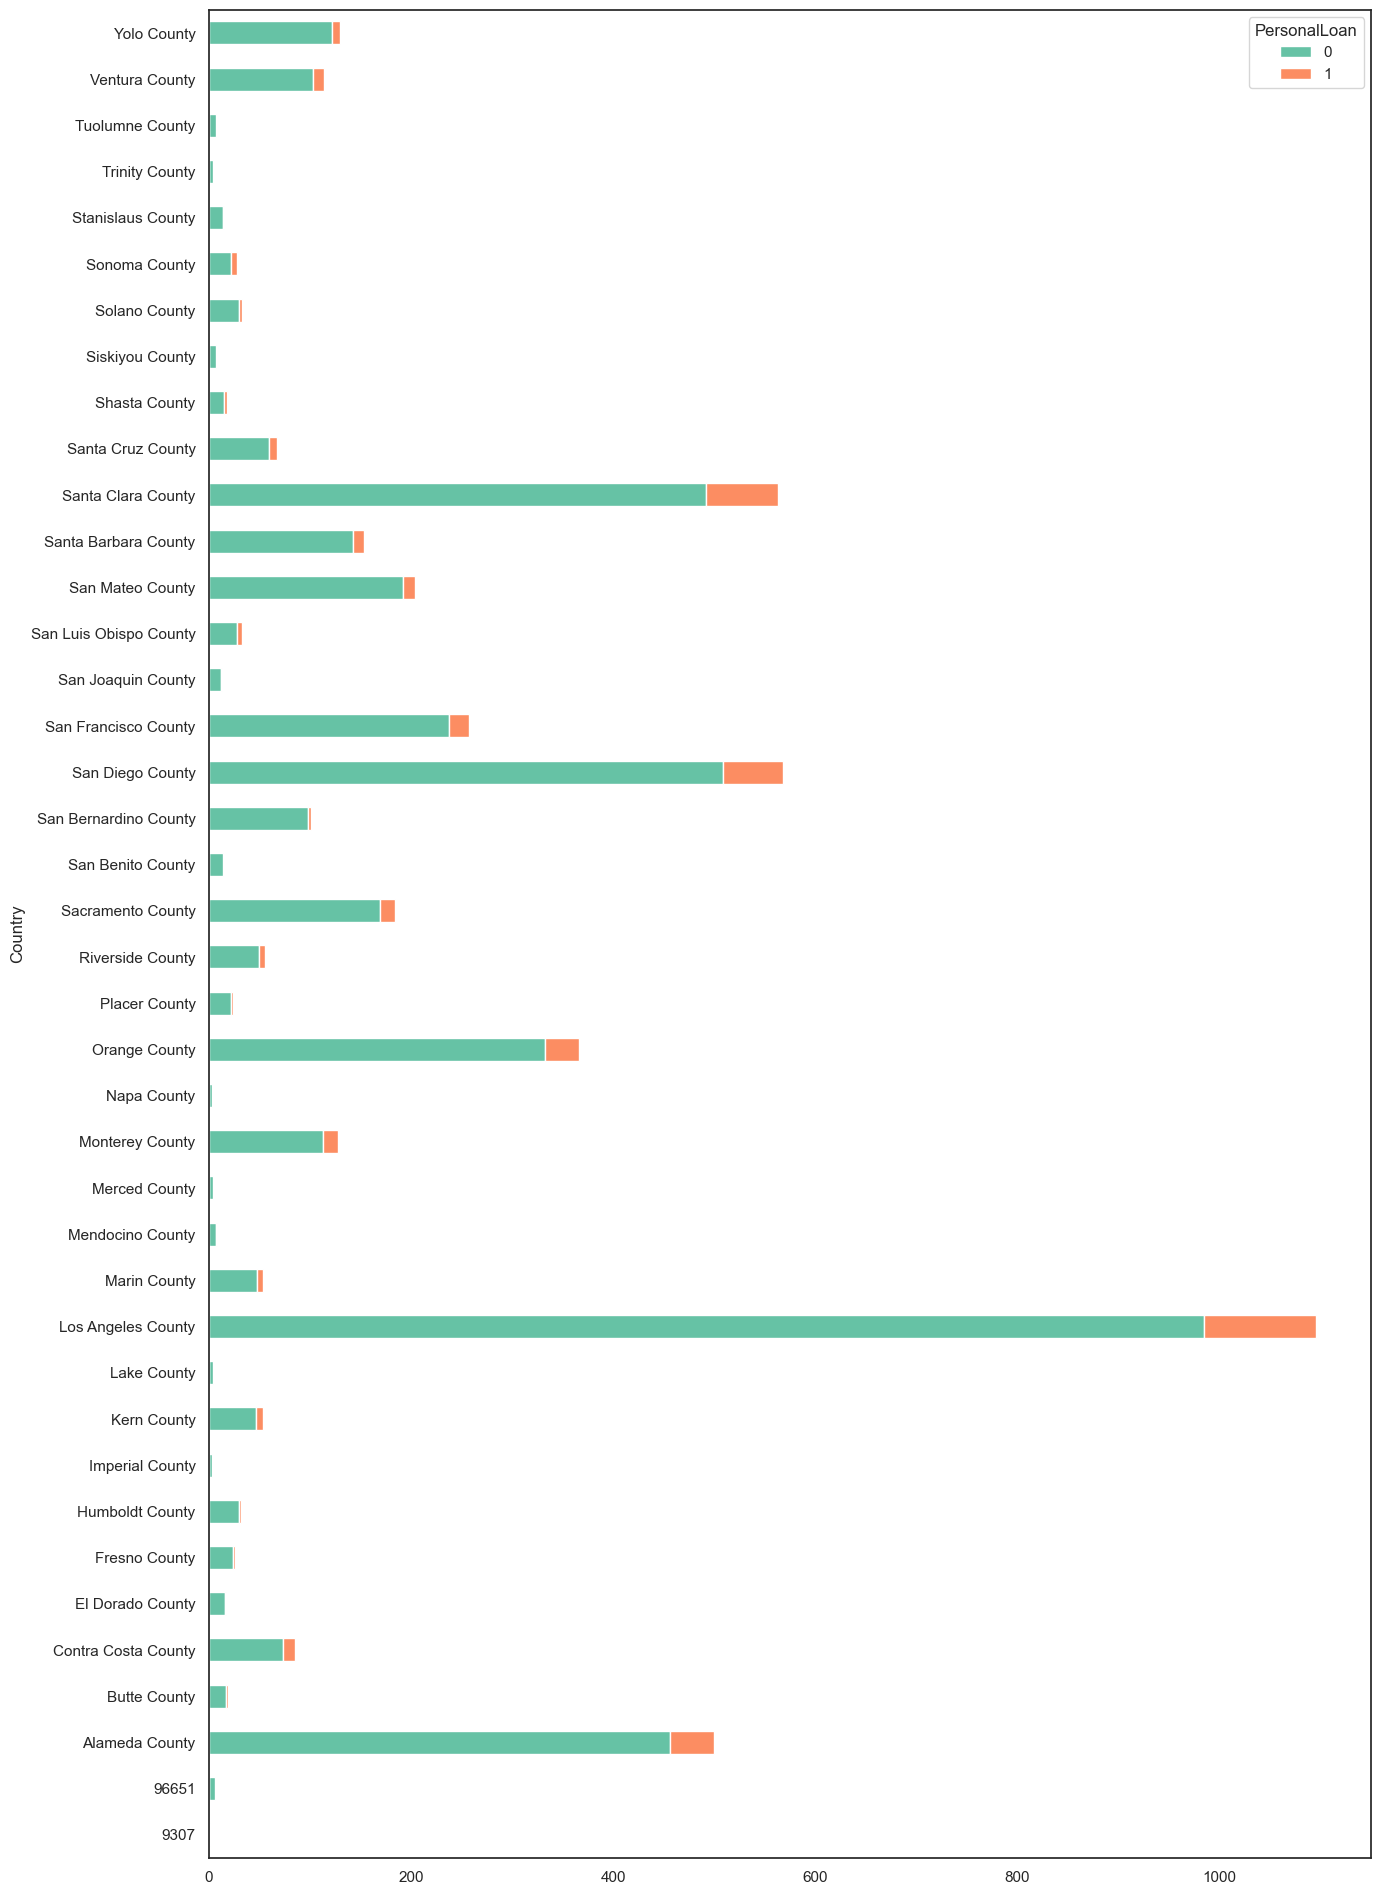

In [131]:
plt.figure(figsize=(15,24))

pd.crosstab(index=df_loan['Country'],columns=df_loan['PersonalLoan'].sort_values(ascending=False)).plot(kind='barh',stacked=True,figsize=(15,24))

It can be seen the percentage of loan taken from various country differ.There are so many county converting them to regions will help in our model

In [132]:
countries = {
'Los Angeles County':'Los Angeles Region',
'San Diego County':'Southern',
'Santa Clara County':'Bay Area',
'Alameda County':'Bay Area',
'Orange County':'Southern',
  'Orange Country':'Southern',  
'San Francisco County':'Bay Area',
'San Mateo County':'Bay Area',
'Sacramento County':'Central',
'Santa Barbara County':'Southern',
'Yolo County':'Central',
'Monterey County':'Bay Area',            
'Ventura County':'Southern',             
'San Bernardino County':'Southern',       
'Contra Costa County':'Bay Area',        
'Santa Cruz County':'Bay Area',           
'Riverside County':'Southern',            
'Kern County':'Southern',                 
'Marin County':'Bay Area',                
'San Luis Obispo County':'Southern',     
'Solano County':'Bay Area',              
'Humboldt County':'Superior',            
'Sonoma County':'Bay Area',                
'Fresno County':'Central',               
'Placer County':'Central',                
'Butte County':'Superior',               
'Shasta County':'Superior',                
'El Dorado County':'Central',             
'Stanislaus County':'Central',            
'San Benito County':'Bay Area',          
'San Joaquin County':'Central',           
'Mendocino County':'Superior',             
'Tuolumne County':'Central',                
'Siskiyou County':'Superior',              
'Trinity County':'Superior',                
'Merced County':'Central',                  
'Lake County':'Superior',                 
'Napa County':'Bay Area',                   
'Imperial County':'Southern',
93077:'Southern',
96651:'Bay Area'
}

In [133]:
df_loan.Country.value_counts()

Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              366
San Francisco County       257
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             114
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Marin County                54
Kern County                 54
Solano County               33
San Luis Obispo County      33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County             8
Tuolumne County              7
Siskiyou

In [134]:
df_loan['Regions'] = df_loan['Country'].map(countries)

In [135]:
df_loan['Regions'].unique()

array(['Los Angeles Region', 'Bay Area', 'Southern', 'Superior',
       'Central', nan], dtype=object)

In [136]:
df_loan.isnull().sum()

Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
Country              0
Agebin               0
Income_group         0
Spending_group       0
Regions              1
dtype: int64

In [137]:
df_loan.dropna(inplace=True)

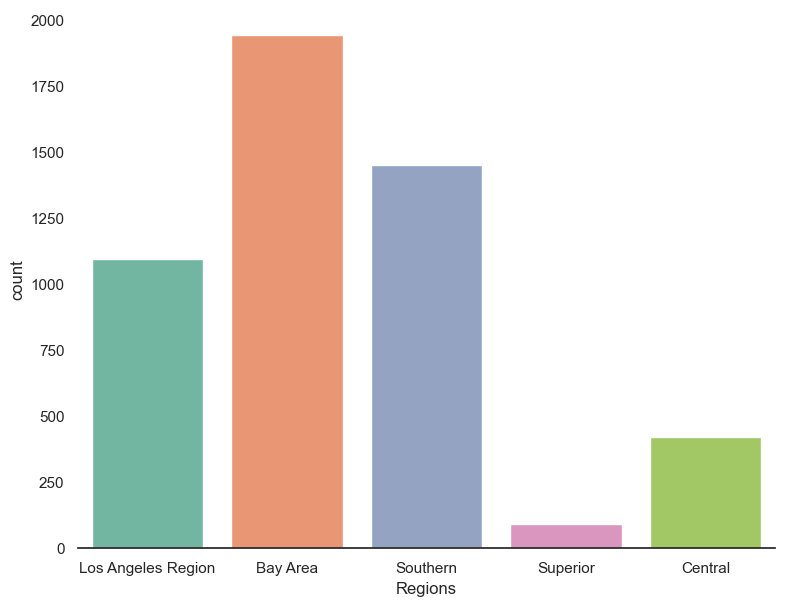

In [138]:
plt.figure(figsize=(9,7))
sns.countplot(data=df_loan,x=df_loan['Regions'])
sns.despine(top=True,right=True,left=True) # to remove side line from graph

# Bivariate & Multivariate Analysis

In [139]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                4999 non-null   int64   
 1   Experience         4999 non-null   int64   
 2   Income             4999 non-null   int64   
 3   ZIPCode            4999 non-null   category
 4   Family             4999 non-null   category
 5   CCAvg              4999 non-null   float64 
 6   Education          4999 non-null   category
 7   Mortgage           4999 non-null   int64   
 8   PersonalLoan       4999 non-null   category
 9   SecuritiesAccount  4999 non-null   category
 10  CDAccount          4999 non-null   category
 11  Online             4999 non-null   category
 12  CreditCard         4999 non-null   category
 13  Country            4999 non-null   category
 14  Agebin             4999 non-null   category
 15  Income_group       4999 non-null   category
 16  Spendi

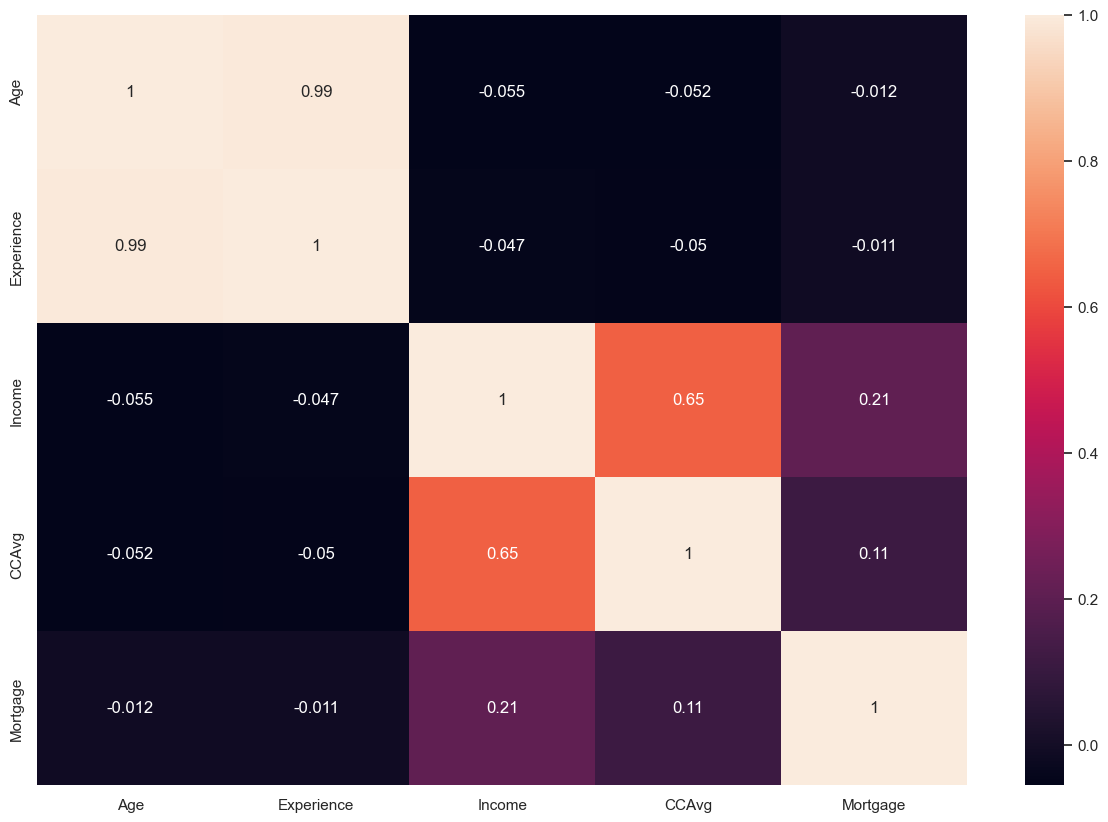

In [140]:
sns.set_palette(sns.color_palette("Set2", 8))
plt.figure(figsize=(15,10))
sns.heatmap(df_loan.corr(),annot=True)
plt.show()

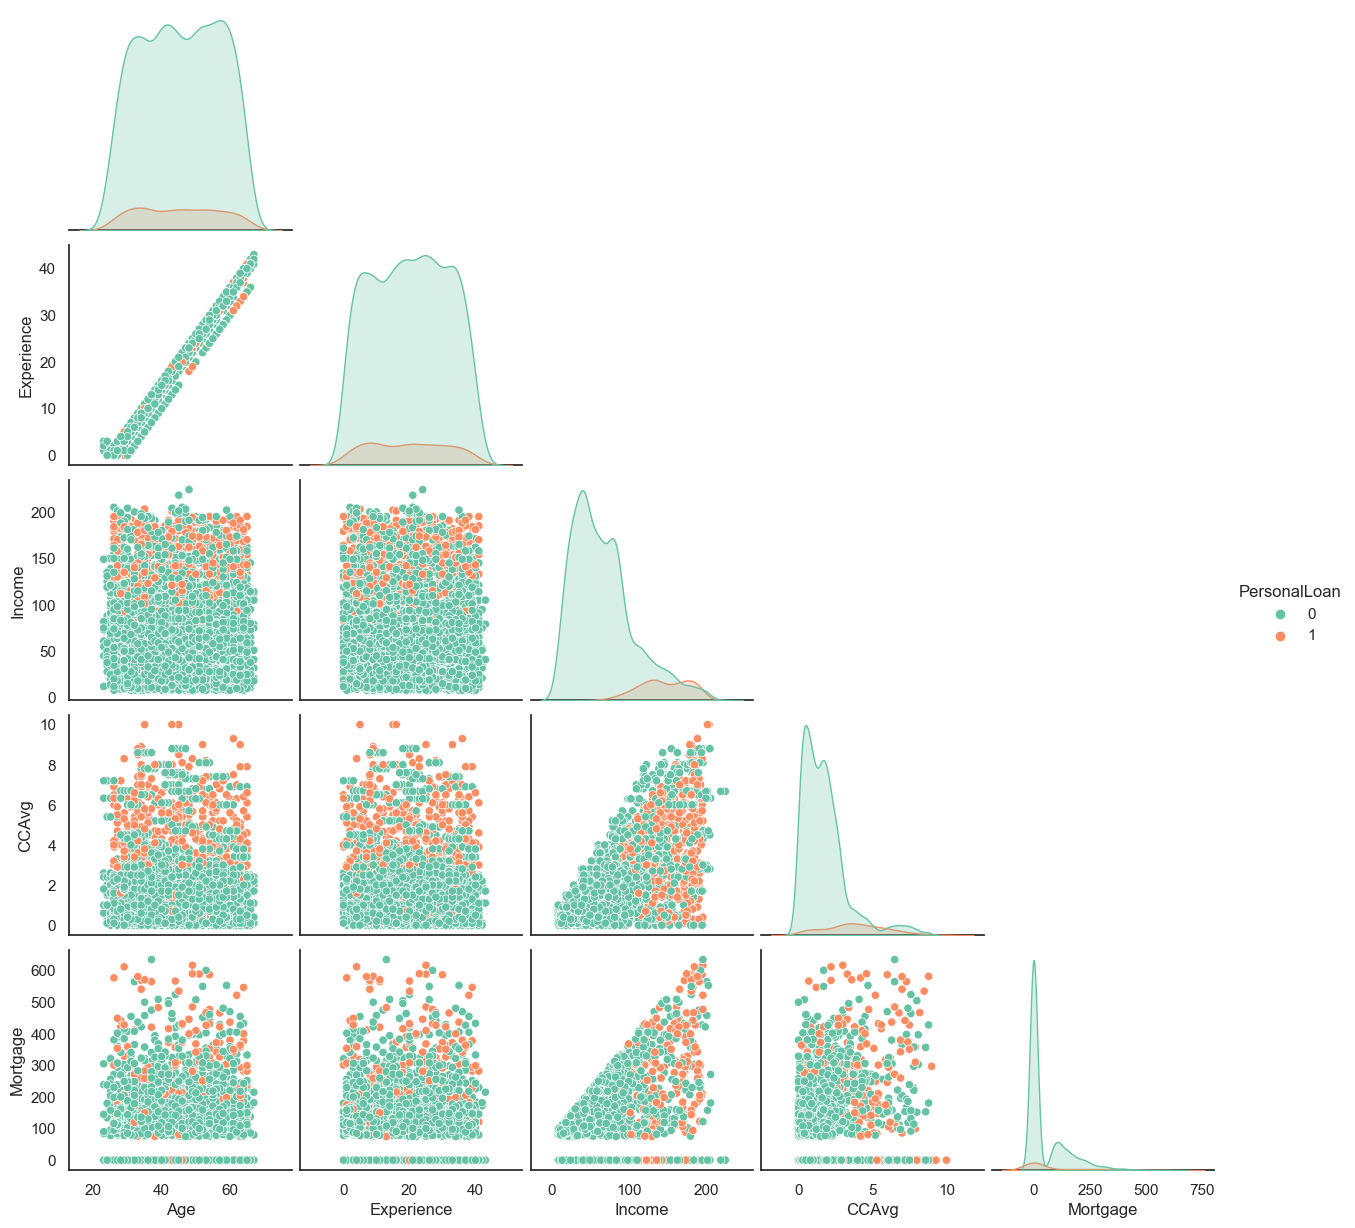

In [141]:
sns.set_palette(sns.color_palette("Set2", 8))
sns.pairplot(df_loan, hue="PersonalLoan",corner=True)
plt.show()

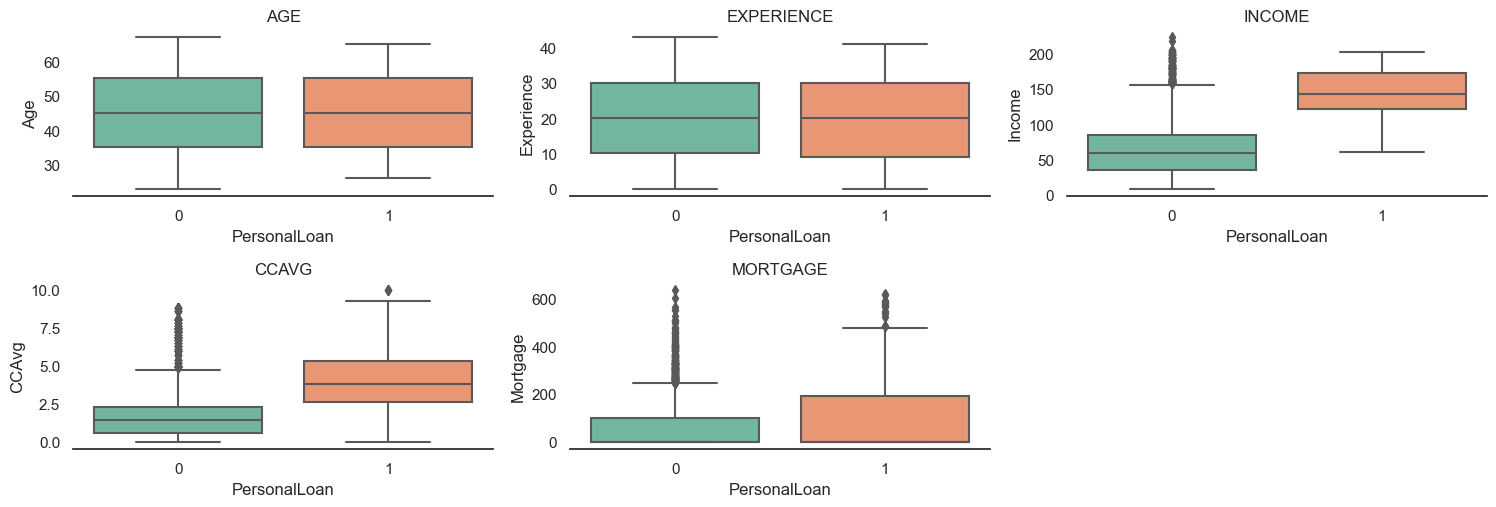

In [142]:
numeric_columns = ['Age','Experience','Income','CCAvg','Mortgage']
plt.figure(figsize=(15,25))

sns.set_palette(sns.color_palette("Set2", 8))
for i, variable in enumerate(numeric_columns):
        plt.subplot(10,3,i+1)
        
        sns.boxplot(x='PersonalLoan',y= df_loan[variable], data=df_loan)     
        sns.despine(top=True,right=True,left=True) # to remove side line from graph
        plt.tight_layout()
        plt.title(variable.upper())

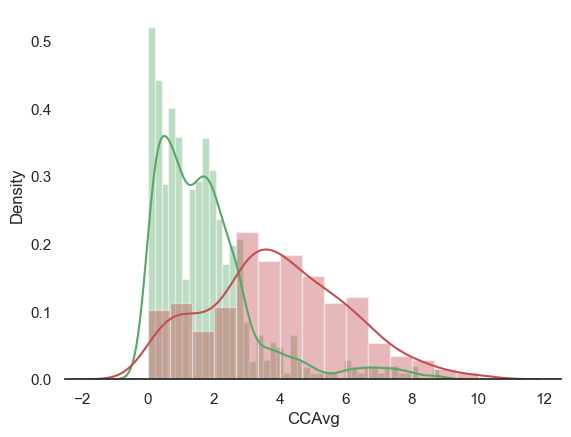

In [143]:
sns.distplot( df_loan[df_loan['PersonalLoan'] == 0]['CCAvg'], color = 'g')
sns.distplot( df_loan[df_loan['PersonalLoan'] == 1]['CCAvg'], color = 'r')
sns.despine(top=True,right=True,left=True) # to remove side line from graph

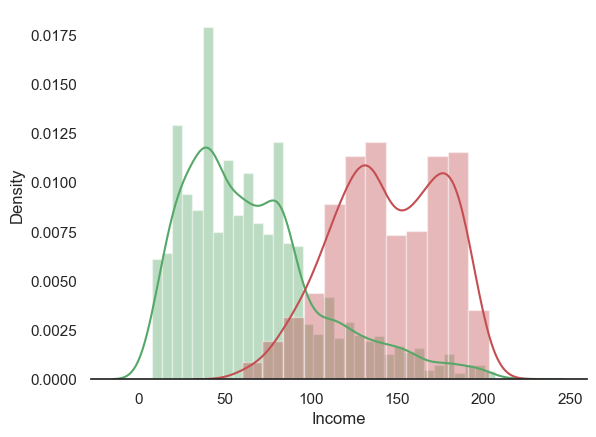

In [144]:
sns.distplot( df_loan[df_loan['PersonalLoan'] == 0]['Income'], color = 'g')
sns.distplot( df_loan[df_loan['PersonalLoan'] == 1]['Income'], color = 'r')
sns.despine(top=True,right=True,left=True) # to remove side line from graph

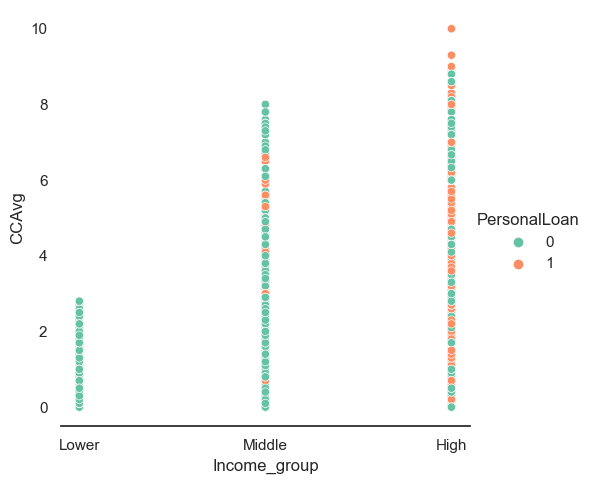

In [145]:
sns.relplot(x='Income_group',y='CCAvg',hue='PersonalLoan',data=df_loan)
sns.despine(top=True,right=True,left=True) # to remove side line from graph

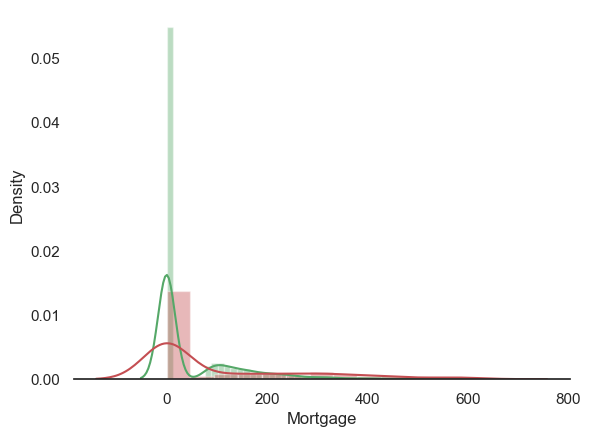

In [146]:
sns.distplot( df_loan[df_loan['PersonalLoan'] == 0]['Mortgage'], color = 'g')
sns.distplot( df_loan[df_loan['PersonalLoan'] == 1]['Mortgage'], color = 'r')
sns.despine(top=True,right=True,left=True) # to remove side line from graph

sns.swarmplot(x='Income_group',y='Mortgage',hue='PersonalLoan',data=df_loan)
sns.despine(top=True,right=True,left=True) # to remove side line from graph

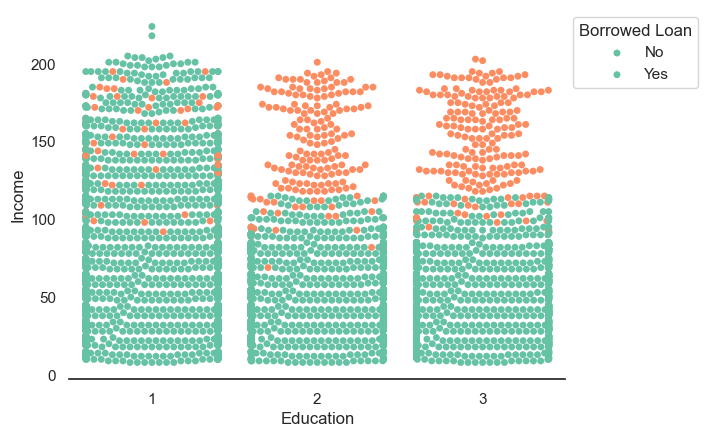

In [147]:
sns.swarmplot(x='Education',y='Income',hue='PersonalLoan',data=df_loan)
sns.despine(top=True,right=True,left=True) # to remove side line from graph
labels=["No","Yes"]
plt.legend(loc='lower left', frameon=False,)
plt.legend(loc="upper left", labels=labels,title="Borrowed Loan",bbox_to_anchor=(1,1))

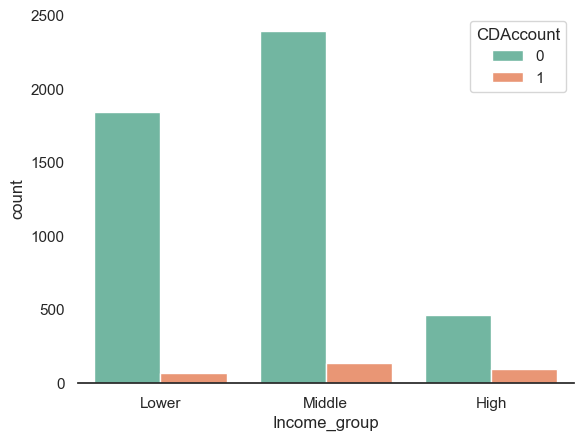

In [148]:
sns.countplot(x='Income_group',hue='CDAccount',data=df_loan)
sns.despine(top=True,right=True,left=True) # to remove side line from graph

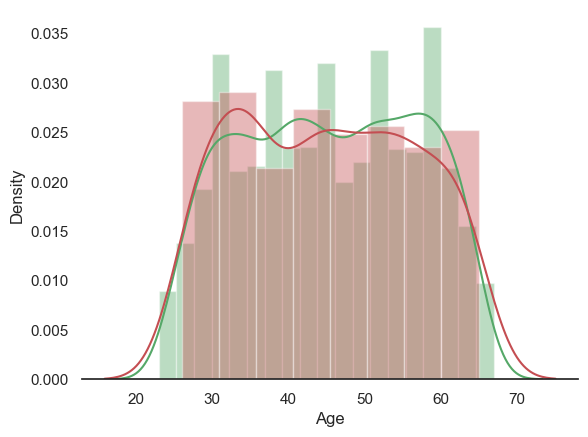

In [149]:
sns.distplot( df_loan[df_loan['PersonalLoan'] == 0]['Age'], color = 'g')
sns.distplot( df_loan[df_loan['PersonalLoan'] == 1]['Age'], color = 'r')
sns.despine(top=True,right=True,left=True) # to remove side line from graph

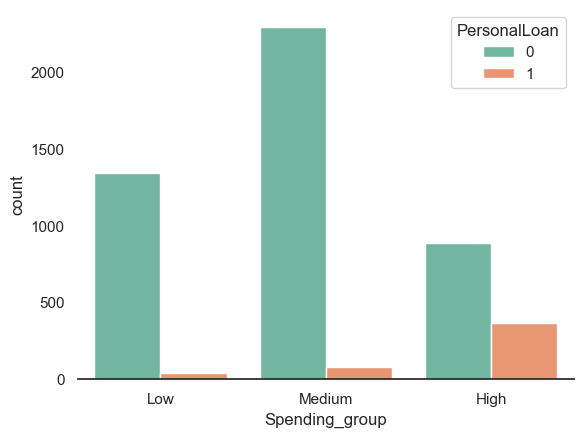

In [150]:
sns.countplot(x='Spending_group',hue='PersonalLoan',data=df_loan)

sns.despine(top=True,right=True,left=True) # to remove side line from graph

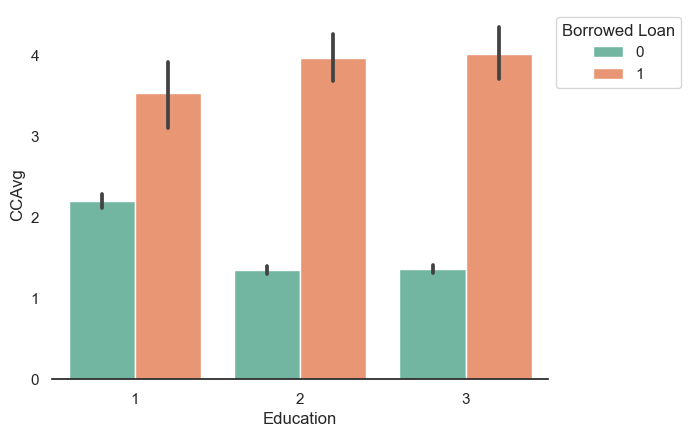

In [151]:
sns.set_palette(sns.color_palette("Set2", 8))
sns.barplot(y='CCAvg',x='Education', hue='PersonalLoan',data=df_loan)
labels=["No","Yes"]
plt.legend(loc="upper left", title="Borrowed Loan",bbox_to_anchor=(1,1))
sns.despine(top=True,right=True,left=True) # to remove side line from graph

Text(0.5, 1.0, 'plloan = 1')

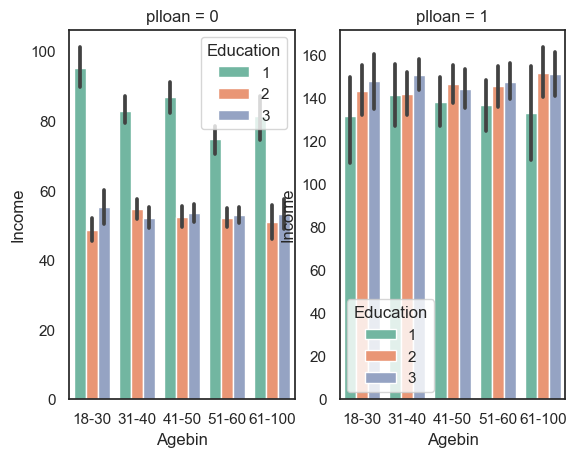

In [152]:
df1 = df_loan[df_loan['PersonalLoan'] == 0]
df2 = df_loan[df_loan['PersonalLoan'] == 1]
plt.subplot(1,2,1)
sns.barplot(y='Income',x='Agebin',hue='Education',data=df1)
plt.title('plloan = 0')
plt.subplot(1,2,2)
sns.barplot(y='Income',x='Agebin',hue='Education',data=df2)
plt.title('plloan = 1')

In [153]:
df_loan.head(2)

Age  Experience  Income ZIPCode Family  CCAvg Education  Mortgage  \
0   25           1      49   91107      4  1.600         1         0   
1   45          19      34   90089      3  1.500         1         0   

  PersonalLoan SecuritiesAccount CDAccount Online CreditCard  \
0            0                 1         0      0          0   
1            0                 1         0      0          0   

              Country Agebin Income_group Spending_group             Regions  
0  Los Angeles County  18-30        Lower         Medium  Los Angeles Region  
1  Los Angeles County  41-50        Lower         Medium  Los Angeles Region

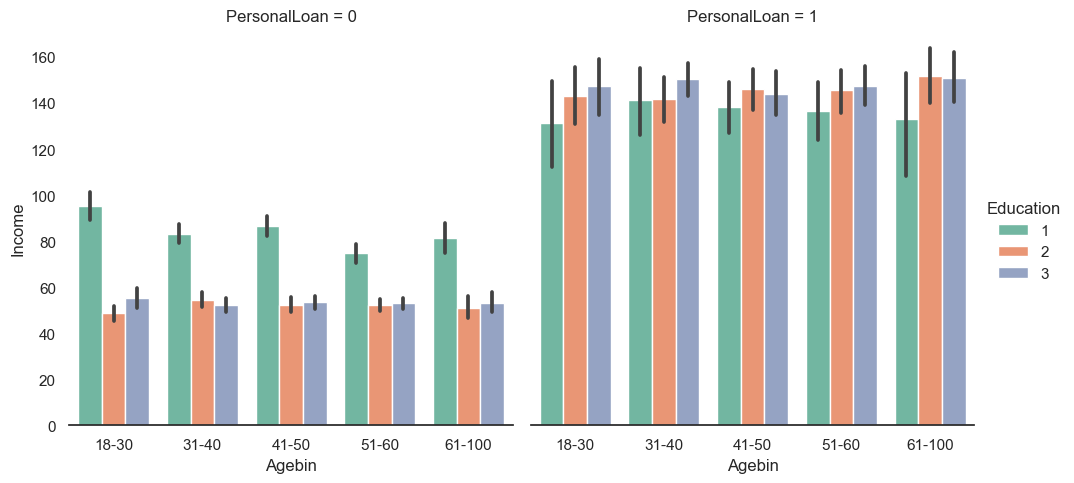

In [154]:
sns.catplot(y='Income',x='Agebin',hue='Education',kind='bar',col="PersonalLoan", data=df_loan)
sns.despine(top=True,right=True,left=True) # to remove side line from graph

In [155]:
## Function to plot stacked bar chart
def stacked_plot(x):
    sns.set_palette(sns.color_palette("Set2", 8))
    tab1 = pd.crosstab(x,df_loan['PersonalLoan'],margins=True)
    
    print('-'*120)
    
    tab = pd.crosstab(x,df_loan['PersonalLoan'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(7,4))
    plt.xticks(rotation=360)
    labels=["No","Yes"]
    
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", labels=labels,title="Borrowed Loan",bbox_to_anchor=(1,1))
    
    sns.despine(top=True,right=True,left=True) # to remove side line from graphprint(tab1)
    #plt.legend(labels)
    plt.show()

------------------------------------------------------------------------------------------------------------------------


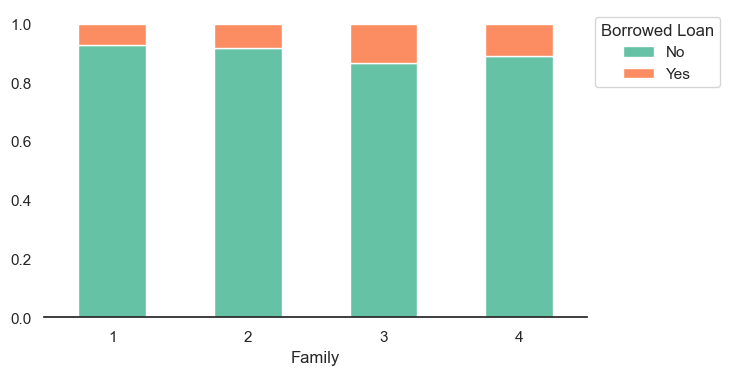

------------------------------------------------------------------------------------------------------------------------


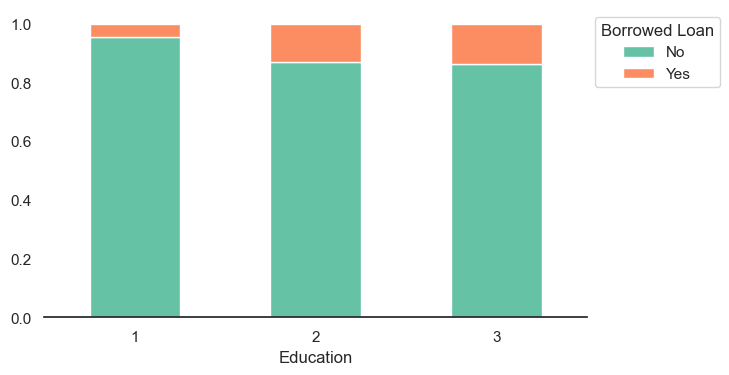

------------------------------------------------------------------------------------------------------------------------


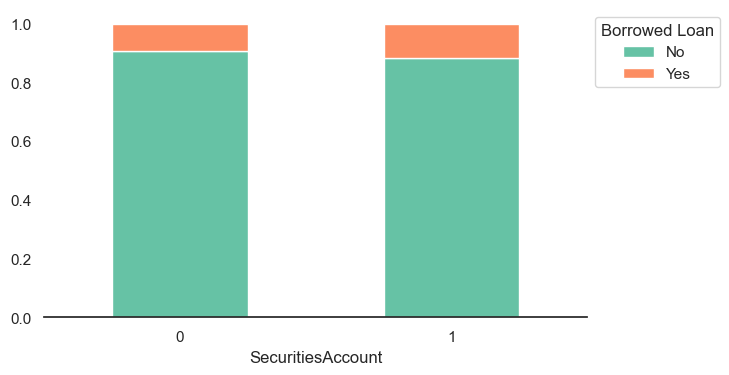

------------------------------------------------------------------------------------------------------------------------


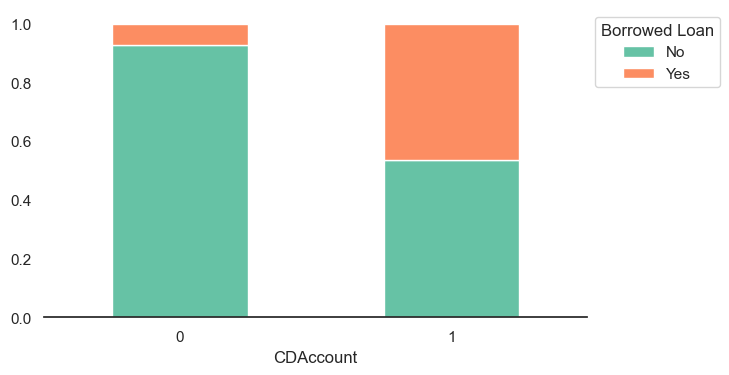

------------------------------------------------------------------------------------------------------------------------


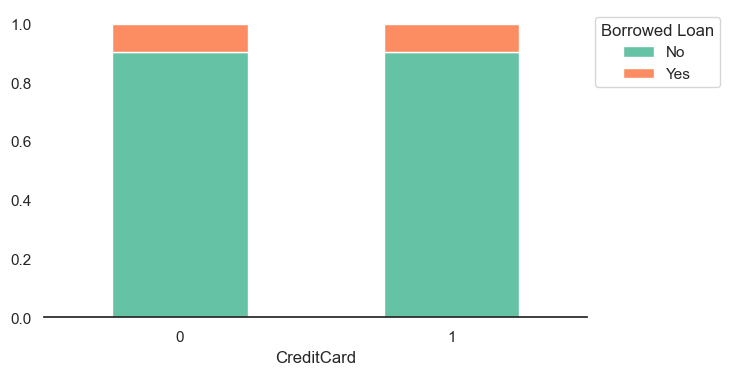

------------------------------------------------------------------------------------------------------------------------


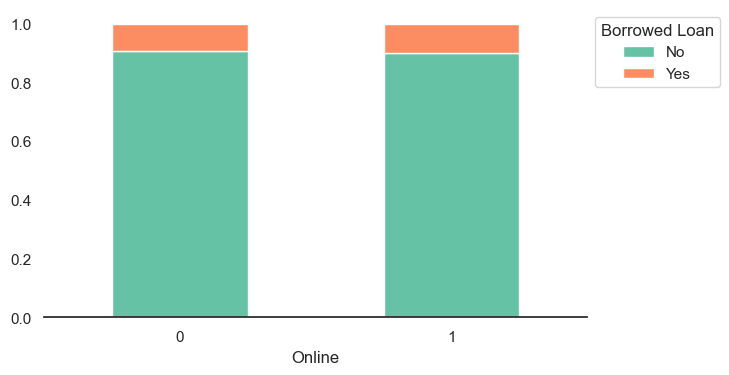

------------------------------------------------------------------------------------------------------------------------


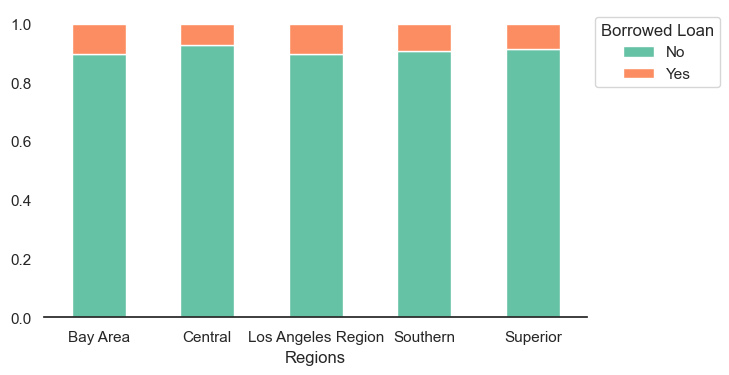

------------------------------------------------------------------------------------------------------------------------


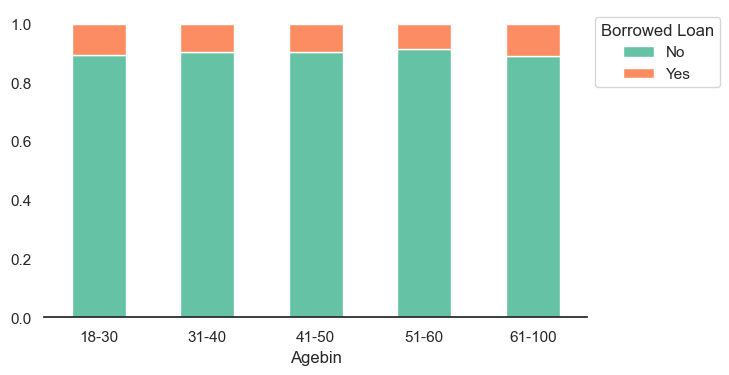

------------------------------------------------------------------------------------------------------------------------


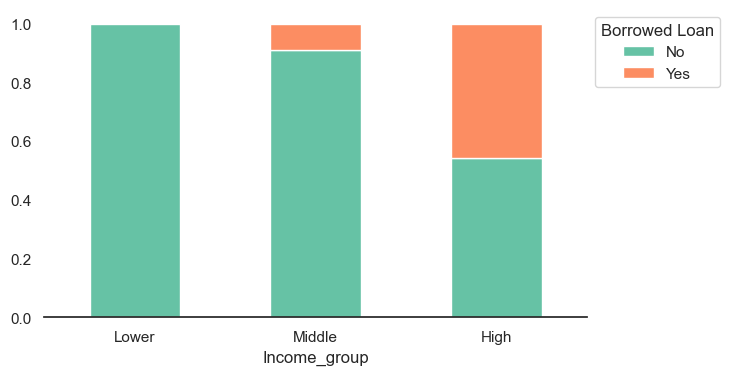

------------------------------------------------------------------------------------------------------------------------


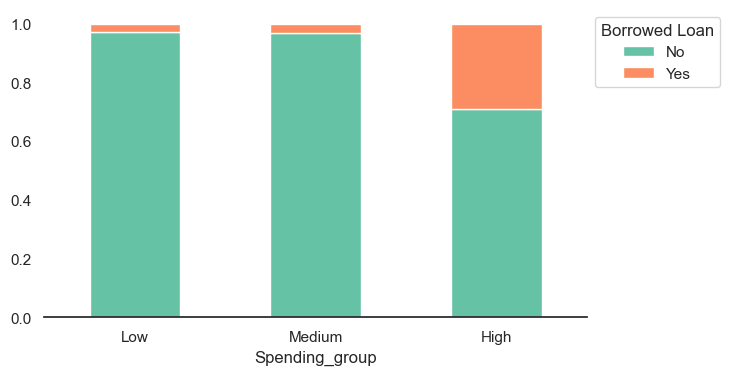

In [156]:
cat_columns=['Family','Education','SecuritiesAccount','CDAccount','CreditCard','Online','Regions','Agebin','Income_group','Spending_group']
for i, variable in enumerate(cat_columns):
       stacked_plot(df_loan[variable])

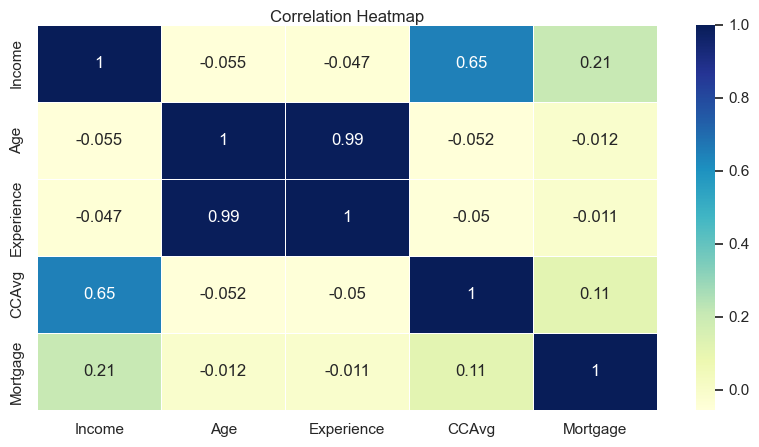

In [157]:
plt.figure(figsize=(10,5))
numerical=['Income','Age','Experience','CCAvg','Mortgage']

# A better color to see the positive or negative correlation of each variable
heatmap = sns.heatmap(df_loan[numerical].corr(), annot=True, cmap='YlGnBu',linewidths=0.5)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=2);

Check distrubution in target column

([<matplotlib.patches.Wedge at 0x16bc5eda1d0>,
 [Text(-1.0503312798154913, 0.3268091226406516, ''),
  Text(1.0503312721659712, -0.3268091472254298, '')],
 [Text(-0.5729079708084497, 0.1782595214403554, '90.4%'),
  Text(0.5729079666359843, -0.1782595348502344, '9.6%')])

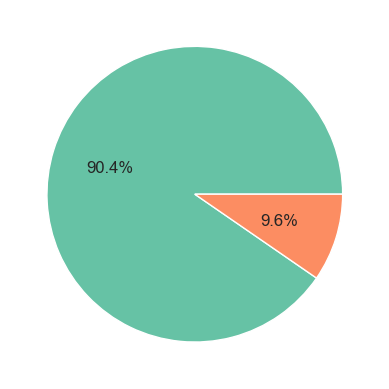

In [158]:
plt.pie(data=df_loan,x=df_loan["PersonalLoan"].value_counts(),autopct='%1.1f%%')

The target variable personal_loan is highly imbalanced where only 9.6% of the customers have previously opted for a personal loan in the dataset. This can be handled using weight or SMOTE.But for now we will carry with on without SMOTE

In [159]:
df_loan.head()

Age  Experience  Income ZIPCode Family  CCAvg Education  Mortgage  \
0   25           1      49   91107      4  1.600         1         0   
1   45          19      34   90089      3  1.500         1         0   
2   39          15      11   94720      1  1.000         1         0   
3   35           9     100   94112      1  2.700         2         0   
4   35           8      45   91330      4  1.000         2         0   

  PersonalLoan SecuritiesAccount CDAccount Online CreditCard  \
0            0                 1         0      0          0   
1            0                 1         0      0          0   
2            0                 0         0      0          0   
3            0                 0         0      0          0   
4            0                 0         0      0          1   

                Country Agebin Income_group Spending_group             Regions  
0    Los Angeles County  18-30        Lower         Medium  Los Angeles Region  
1    Los Angeles County  41-50        Lower         Medium  Los Angeles Region  
2        Alameda County  31-40        Lower         Medium            Bay Area  
3  San Francisco County  31-40       Middle           High            Bay Area  
4    Los Angeles County  31-40        Lower         Medium  Los Angeles Region

In [160]:
# Saving dataset before treating outliers for logistic regression.
df_Decision = df_loan.copy()


Outliers detection

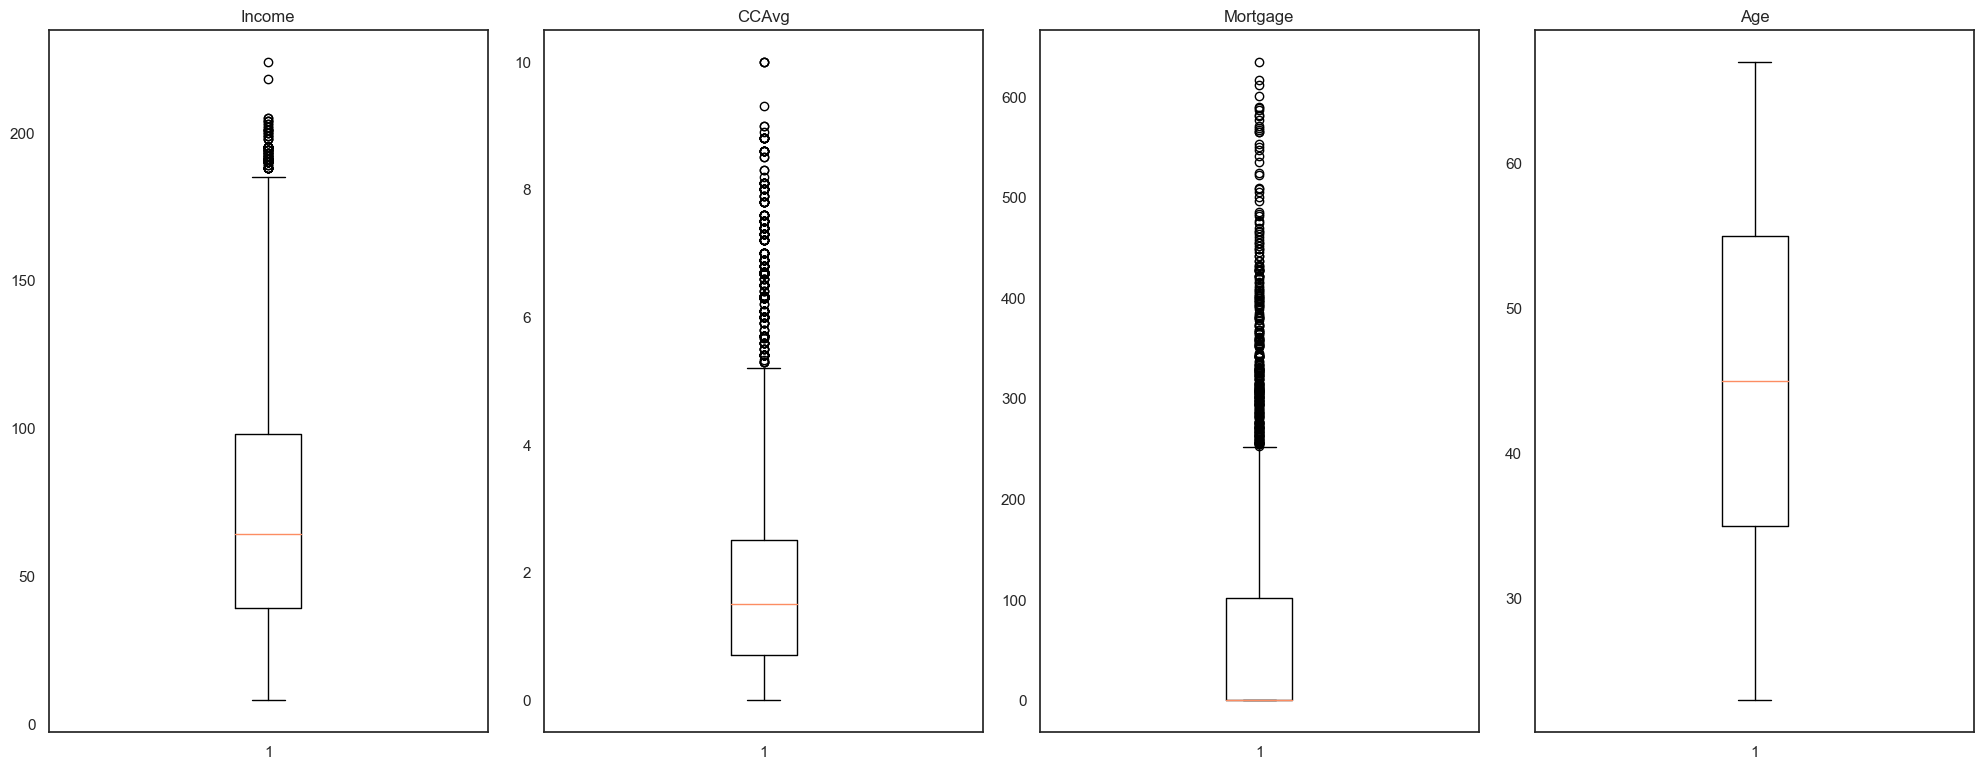

In [161]:
numeric_columns =['Income','CCAvg','Mortgage','Age']
# outlier detection using boxplot
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(4,4,i+1)
                     plt.boxplot(df_loan[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [162]:
# Check Income extreme values
df_loan.sort_values(by=["Income"],ascending = False).head(5)

Age  Experience  Income ZIPCode Family  CCAvg Education  Mortgage  \
3896   48          24     224   93940      2  6.670         1         0   
4993   45          21     218   91801      2  6.670         1         0   
526    26           2     205   93106      1  6.330         1       271   
2988   46          21     205   95762      2  8.800         1       181   
677    46          21     204   92780      2  2.800         1         0   

     PersonalLoan SecuritiesAccount CDAccount Online CreditCard  \
3896            0                 0         1      1          1   
4993            0                 0         0      1          0   
526             0                 0         0      0          1   
2988            0                 1         0      1          0   
677             0                 0         0      1          0   

                   Country Agebin Income_group Spending_group  \
3896       Monterey County  41-50         High           High   
4993    Los Angeles County  41-50         High           High   
526   Santa Barbara County  18-30         High           High   
2988      El Dorado County  41-50         High           High   
677          Orange County  41-50         High           High   

                 Regions  
3896            Bay Area  
4993  Los Angeles Region  
526             Southern  
2988             Central  
677             Southern

In [163]:
df_loan.loc[(df_loan['Age']==48) & (df_loan['Experience']==24)].sort_values(by=['Income'],ascending=False).head(5)

Age  Experience  Income ZIPCode Family  CCAvg Education  Mortgage  \
3896   48          24     224   93940      2  6.670         1         0   
196    48          24     165   93407      1  5.000         1         0   
2217   48          24     162   91355      4  3.300         2       446   
4629   48          24     148   91311      2  3.300         1         0   
4167   48          24     144   94025      4  3.500         2         0   

     PersonalLoan SecuritiesAccount CDAccount Online CreditCard  \
3896            0                 0         1      1          1   
196             0                 0         0      0          1   
2217            1                 0         1      1          0   
4629            0                 0         1      1          1   
4167            1                 0         0      0          0   

                     Country Agebin Income_group Spending_group  \
3896         Monterey County  41-50         High           High   
196   San Luis Obispo County  41-50         High           High   
2217      Los Angeles County  41-50         High           High   
4629      Los Angeles County  41-50         High           High   
4167        San Mateo County  41-50         High           High   

                 Regions  
3896            Bay Area  
196             Southern  
2217  Los Angeles Region  
4629  Los Angeles Region  
4167            Bay Area

In [164]:
# Check Mortgage extreme values
df_loan.sort_values(by=["Mortgage"],ascending = False).head(5)

Age  Experience  Income ZIPCode Family  CCAvg Education  Mortgage  \
2934   37          13     195   91763      2  6.500         1       635   
303    49          25     195   95605      4  3.000         1       617   
4812   29           4     184   92126      4  2.200         3       612   
1783   53          27     192   94720      1  1.700         1       601   
4842   49          23     174   95449      3  4.600         2       590   

     PersonalLoan SecuritiesAccount CDAccount Online CreditCard  \
2934            0                 0         0      1          0   
303             1                 0         0      0          0   
4812            1                 0         0      1          0   
1783            0                 0         0      1          0   
4842            1                 0         0      0          0   

                    Country Agebin Income_group Spending_group   Regions  
2934  San Bernardino County  31-40         High           High  Southern  
303             Yolo County  41-50         High           High   Central  
4812       San Diego County  18-30         High         Medium  Southern  
1783         Alameda County  51-60         High         Medium  Bay Area  
4842       Mendocino County  41-50         High           High  Superior

In [165]:
# Check CCAVg extreme values
df_loan.sort_values(by=["CCAvg"],ascending = False).head(5)

Age  Experience  Income ZIPCode Family  CCAvg Education  Mortgage  \
2101   35           5     203   95032      1 10.000         3         0   
2337   43          16     201   95054      1 10.000         2         0   
787    45          15     202   91380      3 10.000         3         0   
3943   61          36     188   91360      1  9.300         2         0   
1339   52          25     180   94545      2  9.000         2       297   

     PersonalLoan SecuritiesAccount CDAccount Online CreditCard  \
2101            1                 0         0      0          0   
2337            1                 0         0      0          1   
787             1                 0         0      0          0   
3943            1                 0         0      0          0   
1339            1                 0         0      1          0   

                 Country  Agebin Income_group Spending_group  \
2101  Santa Clara County   31-40         High           High   
2337  Santa Clara County   41-50         High           High   
787   Los Angeles County   41-50         High           High   
3943      Ventura County  61-100         High           High   
1339      Alameda County   51-60         High           High   

                 Regions  
2101            Bay Area  
2337            Bay Area  
787   Los Angeles Region  
3943            Southern  
1339            Bay Area

This is some really extreme values in income 224K USD compared to same age group and experience. Values for Credit card and Mortages looks fine.After identifying outliers, we can decide whether to remove/treat them or not. It depends,here I am not going to treat them as there will be outliers in real case scenario (in Income, Mortgage value, Average spending on the credit card, etc) and we would want our model to learn the underlying pattern for such customers.

In [166]:
#drop column which we don't need for modelling
df_loan.drop(columns=["Agebin", "ZIPCode","Country",'Experience','Income_group','Spending_group'], inplace=True)

We have 6 categorical independent variables but 4 of them are binary, so we'll have the same results with them even after creating dummies So we will only make dummies for Regions and Education.

In [167]:
X = df_loan.drop(['PersonalLoan'], axis=1)
Y = df_loan['PersonalLoan']

oneHotCols=['Regions','Education']
X=pd.get_dummies(X,columns=oneHotCols,drop_first=True)

In [168]:
X

Age  Income Family  CCAvg  Mortgage SecuritiesAccount CDAccount Online  \
0      25      49      4  1.600         0                 1         0      0   
1      45      34      3  1.500         0                 1         0      0   
2      39      11      1  1.000         0                 0         0      0   
3      35     100      1  2.700         0                 0         0      0   
4      35      45      4  1.000         0                 0         0      0   
...   ...     ...    ...    ...       ...               ...       ...    ...   
4995   29      40      1  1.900         0                 0         0      1   
4996   30      15      4  0.400        85                 0         0      1   
4997   63      24      2  0.300         0                 0         0      0   
4998   65      49      3  0.500         0                 0         0      1   
4999   28      83      3  0.800         0                 0         0      1   

     CreditCard  Regions_Central  Regions_Los Angeles Region  \
0             0                0                           1   
1             0                0                           1   
2             0                0                           0   
3             0                0                           0   
4             1                0                           1   
...         ...              ...                         ...   
4995          0                0                           0   
4996          0                0                           0   
4997          0                0                           0   
4998          0                0                           1   
4999          1                0                           0   

      Regions_Southern  Regions_Superior  Education_2  Education_3  
0                    0                 0            0            0  
1                    0                 0            0            0  
2                    0                 0            0            0  
3                    0                 0            1            0  
4                    0                 0            1            0  
...                ...               ...          ...          ...  
4995                 1                 0            0            1  
4996                 1                 0            0            0  
4997                 1                 0            0            1  
4998                 0                 0            1            0  
4999                 1                 0            0            0  

[4999 rows x 15 columns]

In [169]:
#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1,stratify=Y)

xtrain = fit_transform - input to the model  
xtest = transform - prediction 
X_scaler = scaler.fit_transform(X_train)

In [170]:
from sklearn.preprocessing import StandardScaler
# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [171]:
X_train_scaled_df.index=np.arange(len(X_train_scaled_df))
X_test_scaled_df.index=np.arange(len(X_test_scaled_df))

y_train.index=np.arange(len(y_train))
y_test.index=np.arange(len(y_test))

In [172]:
def make_confusion_matrix(y_actual,y_predict,title):
    fig, ax = plt.subplots(1, 1)
    
    cm = confusion_matrix(y_actual, y_predict, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=["No","Yes"])
    disp.plot(cmap='Greens',colorbar=True,ax=ax)
    ax.set_title(title)
    plt.tick_params(axis=u'both', which=u'both',length=0)
    #plt.grid(b=None,axis='both',which='both',visible=False)
    plt.show()

    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    X_train_df, X_test_df: Independent features
    y_train_pass,y_test_pass: Dependent variable
    statsklearn : 0 if calling for Sklearn model else 1
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.

In [173]:
def get_metrics_score(model,X_train_df,X_test_df,y_train_pass,y_test_pass,statsklearn,threshold=0.5,flag=True,roc=False):

    # defining an empty list to store train and test results
    
    score_list=[] 
    
    if statsklearn==0:
        pred_train = model.predict(X_train_df)
        pred_test = model.predict(X_test_df)
    else:
        pred_train = (model.predict(X_train_df)>threshold)
        pred_test = (model.predict(X_test_df)>threshold)
    
    
    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    
    train_acc = accuracy_score(y_train_pass,pred_train)
    test_acc = accuracy_score(y_test_pass,pred_test)
    
    train_recall = recall_score(y_train_pass,pred_train)
    test_recall = recall_score(y_test_pass,pred_test)
    
    train_precision = precision_score(y_train_pass,pred_train)
    test_precision = precision_score(y_test_pass,pred_test)
    
    train_f1 = f1_score(y_train_pass,pred_train)
    test_f1 = f1_score(y_test_pass,pred_test) 
    #till here - all metrics are assigned variables separately
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
      
    if flag == True: 
        print("\x1b[0;30;47m \033[1mMODEL PERFORMANCE\x1b[0m")
        
        print("\x1b[0;30;47m \033[1mAccuracy   : Train:\x1b[0m",
              round(accuracy_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m ",
              round(accuracy_score(y_test_pass,pred_test),3))
        
        print("\x1b[0;30;47m \033[1mRecall     : Train:\x1b[0m"
              ,round(recall_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m" ,
              round(recall_score(y_test_pass,pred_test),3))
        
        print("\x1b[0;30;47m \033[1mPrecision  : Train:\x1b[0m",
              round(precision_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m ",
              round(precision_score(y_test_pass,pred_test),3))
        
        print("\x1b[0;30;47m \033[1mF1         : Train:\x1b[0m",
              round(f1_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m",
              round(f1_score(y_test_pass,pred_test),3))
        
        make_confusion_matrix(y_train_pass,pred_train,"Confusion Matrix for Train")     
        make_confusion_matrix(y_test_pass,pred_test,"Confusion Matrix for Test") 
   
    if roc == True:
        
        print("\x1b[0;30;47m \033[1mROC-AUC Score  :Train:\x1b[0m: ",
              round(roc_auc_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m: ",
              round(roc_auc_score(y_test_pass,pred_test),3))
    
    return score_list # returning the list with train and test scores

In [174]:
# # defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

def add_score_model(score):
     #'''Add scores to list so that we can compare all models score together'''   
    acc_train.append(score[0])
    acc_test.append(score[1])
    recall_train.append(score[2])
    recall_test.append(score[3])
    precision_train.append(score[4])
    precision_test.append(score[5])
    f1_train.append(score[6])
    f1_test.append(score[7])

 MODEL PERFORMANCE
 Accuracy   : Train: 0.658  Test:  0.65
 Recall     : Train: 0.979  Test: 0.986
 Precision  : Train: 0.217  Test:  0.214
 F1         : Train: 0.355  Test: 0.351


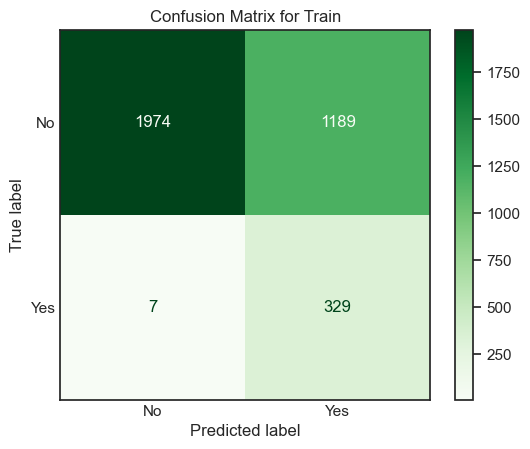

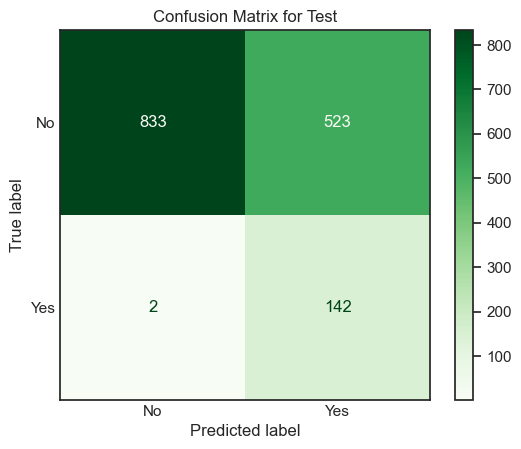

In [176]:
lr = LogisticRegression(solver='newton-cg',random_state=1,fit_intercept=False,class_weight={0:0.15,1:0.85})
model  = lr.fit(X_train_scaled_df,y_train)

statmodel=0  #1 for sklearn and 0 for statmodel

# Let's check model performances for this model
scores_Sklearn = get_metrics_score(model,X_train_scaled_df,X_test_scaled_df,y_train,y_test,statmodel)

In [177]:
add_score_model(scores_Sklearn)

Optimization terminated successfully.
         Current function value: 0.113898
         Iterations 9
 MODEL PERFORMANCE
 Accuracy   : Train: 0.962  Test:  0.953
 Recall     : Train: 0.688  Test: 0.653
 Precision  : Train: 0.888  Test:  0.817
 F1         : Train: 0.775  Test: 0.726


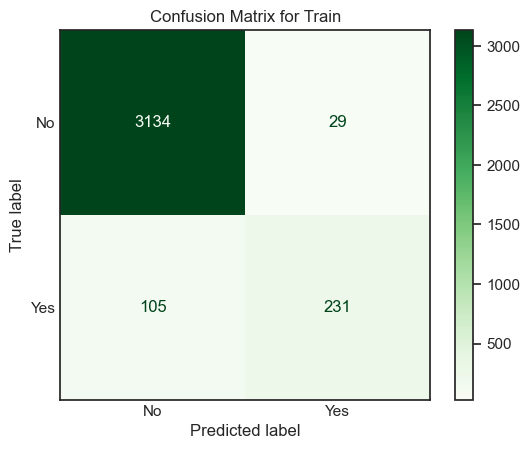

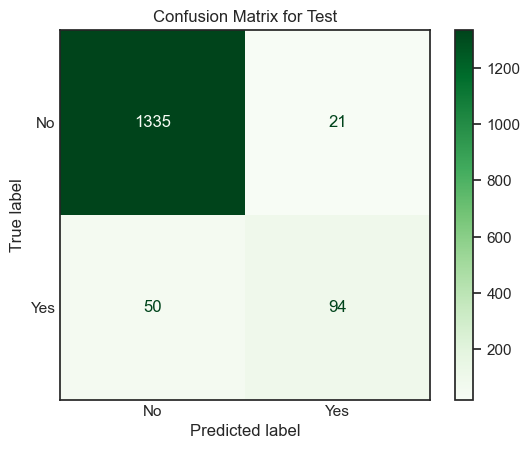

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           PersonalLoan   No. Observations:                 3499
Model:                          Logit   Df Residuals:                     3483
Method:                           MLE   Df Model:                           15
Date:                Sun, 01 Oct 2023   Pseudo R-squ.:                  0.6399
Time:                        12:17:52   Log-Likelihood:                -398.53
converged:                       True   LL-Null:                       -1106.6
Covariance Type:            nonrobust   LLR p-value:                5.492e-293
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -5.2604      0.236    -22.276      0.000      -5.723      -4.798
Age                            0.1547      0.096      1.618      0.106      -0.033       0.342
Income                         3.0106      0.177     17.055      0.000       2.665       3.357
Family                         0.7829      0.108      7.278      0.000       0.572       0.994
CCAvg                          0.2176      0.094      2.310      0.021       0.033       0.402
Mortgage                       0.0874      0.073      1.206      0.228      -0.055       0.230
SecuritiesAccount             -0.2303      0.112     -2.056      0.040      -0.450      -0.011
CDAccount                      0.8431      0.100      8.459      0.000       0.648       1.038
Online                        -0.3423      0.099     -3.457      0.001      -0.536      -0.148
CreditCard                    -0.3662      0.116     -3.153      0.002      -0.594      -0.139
Regions_Central               -0.1968      0.111     -1.781      0.075      -0.413       0.020
Regions_Los Angeles Region    -0.0451      0.102     -0.444      0.657      -0.244       0.154
Regions_Southern              -0.0149      0.104     -0.143      0.886      -0.219       0.189
Regions_Superior              -0.3143      0.216     -1.456      0.145      -0.737       0.109
Education_2                    1.8569      0.150     12.375      0.000       1.563       2.151
Education_3                    1.9912      0.152     13.101      0.000       1.693       2.289
==============================================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [178]:
# adding constant to training and test set
X_train_stat = sm.add_constant(X_train_scaled_df)
X_test_stat = sm.add_constant(X_test_scaled_df)
statmodel=1  #0 for sklearn and 1 for statmodel
logit = sm.Logit( y_train, X_train_stat.astype(float) )
lg = logit.fit(warn_convergence=False)

# Let's check model performances for this model
scores_statmodel = get_metrics_score(lg,X_train_stat,X_test_stat,y_train,y_test,statmodel)
lg.summary() 

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.

MultiCollinearity

we will have to check and remove multicollinearity from the data to get reliable coefficients and p-values. There are different ways of detecting (or testing) multi-collinearity, one such way is the Variation Inflation Factor.* 

General Rule of thumb: If VIF is 1 then there is no correlation among the predictor and the remaining predictor variables.
Whereas if VIF exceeds 5, we say it shows signs of high multi-collinearity. But the purpose of the analysis should dictate which threshold to use.

In [179]:
# changing datatype of colums to numeric for checking vif
X_train_num = X_train_stat.astype(float).copy()

In [180]:
vif_series1 = pd.Series([variance_inflation_factor(X_train_num.values,i) for i in range(X_train_num.shape[1])],index=X_train_num.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                        1.000
Age                          1.010
Income                       1.908
Family                       1.050
CCAvg                        1.743
Mortgage                     1.064
SecuritiesAccount            1.155
CDAccount                    1.358
Online                       1.047
CreditCard                   1.115
Regions_Central              1.118
Regions_Los Angeles Region   1.221
Regions_Southern             1.241
Regions_Superior             1.028
Education_2                  1.287
Education_3                  1.259
dtype: float64



In [181]:
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           PersonalLoan   No. Observations:                 3499
Model:                          Logit   Df Residuals:                     3483
Method:                           MLE   Df Model:                           15
Date:                Sun, 01 Oct 2023   Pseudo R-squ.:                  0.6399
Time:                        12:17:54   Log-Likelihood:                -398.53
converged:                       True   LL-Null:                       -1106.6
Covariance Type:            nonrobust   LLR p-value:                5.492e-293
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -5.2604      0.236    -22.276      0.000      -5.723      -4.798
Age                            0.1547      0.096      1.618      0.106      -0.033       0.342
Income                         3.0106      0.177     17.055      0.000       2.665       3.357
Family                         0.7829      0.108      7.278      0.000       0.572       0.994
CCAvg                          0.2176      0.094      2.310      0.021       0.033       0.402
Mortgage                       0.0874      0.073      1.206      0.228      -0.055       0.230
SecuritiesAccount             -0.2303      0.112     -2.056      0.040      -0.450      -0.011
CDAccount                      0.8431      0.100      8.459      0.000       0.648       1.038
Online                        -0.3423      0.099     -3.457      0.001      -0.536      -0.148
CreditCard                    -0.3662      0.116     -3.153      0.002      -0.594      -0.139
Regions_Central               -0.1968      0.111     -1.781      0.075      -0.413       0.020
Regions_Los Angeles Region    -0.0451      0.102     -0.444      0.657      -0.244       0.154
Regions_Southern              -0.0149      0.104     -0.143      0.886      -0.219       0.189
Regions_Superior              -0.3143      0.216     -1.456      0.145      -0.737       0.109
Education_2                    1.8569      0.150     12.375      0.000       1.563       2.151
Education_3                    1.9912      0.152     13.101      0.000       1.693       2.289
==============================================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In this case 'Regions' all the attributes have a high p-value which means it is not significant therefore we can drop the complete variable.

In [182]:
X_train1 = X_train_stat.drop(['Regions_Central', 'Regions_Los Angeles Region', 'Regions_Southern', 'Regions_Superior'], axis = 1)
X_test1= X_test_stat.drop(['Regions_Central', 'Regions_Los Angeles Region', 'Regions_Southern', 'Regions_Superior'], axis = 1)

logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(warn_convergence =False)

lg1.summary()

Optimization terminated successfully.
         Current function value: 0.114762
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           PersonalLoan   No. Observations:                 3499
Model:                          Logit   Df Residuals:                     3487
Method:                           MLE   Df Model:                           11
Date:                Sun, 01 Oct 2023   Pseudo R-squ.:                  0.6371
Time:                        12:17:55   Log-Likelihood:                -401.55
converged:                       True   LL-Null:                       -1106.6
Covariance Type:            nonrobust   LLR p-value:                7.885e-296
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.1980      0.230    -22.607      0.000      -5.649      -4.747
Age                   0.1507      0.095      1.585      0.113      -0.036       0.337
Income                2.9923      0.174     17.158      0.000       2.650       3.334
Family                0.7735      0.107      7.240      0.000       0.564       0.983
CCAvg                 0.2112      0.093      2.266      0.023       0.028       0.394
Mortgage              0.0806      0.072      1.116      0.264      -0.061       0.222
SecuritiesAccount    -0.2293      0.113     -2.036      0.042      -0.450      -0.009
CDAccount             0.8396      0.099      8.469      0.000       0.645       1.034
Online               -0.3457      0.099     -3.505      0.000      -0.539      -0.152
CreditCard           -0.3831      0.116     -3.298      0.001      -0.611      -0.155
Education_2           1.8450      0.149     12.388      0.000       1.553       2.137
Education_3           1.9776      0.151     13.123      0.000       1.682       2.273
=====================================================================================

Possibly complete quasi-separation: A fraction 0.12 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [183]:
X_train2 = X_train1.drop(['Mortgage'], axis = 1)
X_test2= X_test1.drop(['Mortgage'], axis = 1)
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit()
lg2.summary()

Optimization terminated successfully.
         Current function value: 0.114939
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           PersonalLoan   No. Observations:                 3499
Model:                          Logit   Df Residuals:                     3488
Method:                           MLE   Df Model:                           10
Date:                Sun, 01 Oct 2023   Pseudo R-squ.:                  0.6366
Time:                        12:17:55   Log-Likelihood:                -402.17
converged:                       True   LL-Null:                       -1106.6
Covariance Type:            nonrobust   LLR p-value:                1.199e-296
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.1941      0.230    -22.613      0.000      -5.644      -4.744
Age                   0.1492      0.095      1.572      0.116      -0.037       0.335
Income                3.0134      0.174     17.341      0.000       2.673       3.354
Family                0.7769      0.107      7.266      0.000       0.567       0.987
CCAvg                 0.1986      0.092      2.148      0.032       0.017       0.380
SecuritiesAccount    -0.2317      0.113     -2.059      0.040      -0.452      -0.011
CDAccount             0.8427      0.099      8.495      0.000       0.648       1.037
Online               -0.3437      0.098     -3.491      0.000      -0.537      -0.151
CreditCard           -0.3882      0.116     -3.348      0.001      -0.616      -0.161
Education_2           1.8369      0.148     12.371      0.000       1.546       2.128
Education_3           1.9659      0.150     13.110      0.000       1.672       2.260
=====================================================================================

Possibly complete quasi-separation: A fraction 0.12 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

X_train3 = X_train2.drop([['Age'],['Mortgage']], axis = 1)

In [184]:
X_train3 = X_train2.drop(['Age'], axis = 1)
X_test3= X_test2.drop(['Age'], axis = 1)
logit3 = sm.Logit(y_train, X_train3.astype(float))
lg3 = logit3.fit()
lg3.summary()

Optimization terminated successfully.
         Current function value: 0.115294
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           PersonalLoan   No. Observations:                 3499
Model:                          Logit   Df Residuals:                     3489
Method:                           MLE   Df Model:                            9
Date:                Sun, 01 Oct 2023   Pseudo R-squ.:                  0.6355
Time:                        12:17:55   Log-Likelihood:                -403.41
converged:                       True   LL-Null:                       -1106.6
Covariance Type:            nonrobust   LLR p-value:                3.200e-297
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.1735      0.228    -22.704      0.000      -5.620      -4.727
Income                3.0026      0.173     17.369      0.000       2.664       3.341
Family                0.7691      0.107      7.196      0.000       0.560       0.979
CCAvg                 0.1792      0.092      1.948      0.051      -0.001       0.360
SecuritiesAccount    -0.2338      0.112     -2.080      0.037      -0.454      -0.014
CDAccount             0.8444      0.099      8.522      0.000       0.650       1.039
Online               -0.3354      0.098     -3.417      0.001      -0.528      -0.143
CreditCard           -0.3854      0.116     -3.322      0.001      -0.613      -0.158
Education_2           1.8329      0.148     12.361      0.000       1.542       2.123
Education_3           1.9513      0.149     13.106      0.000       1.659       2.243
=====================================================================================

Possibly complete quasi-separation: A fraction 0.11 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

 MODEL PERFORMANCE
 Accuracy   : Train: 0.959  Test:  0.956
 Recall     : Train: 0.682  Test: 0.674
 Precision  : Train: 0.864  Test:  0.836
 F1         : Train: 0.762  Test: 0.746


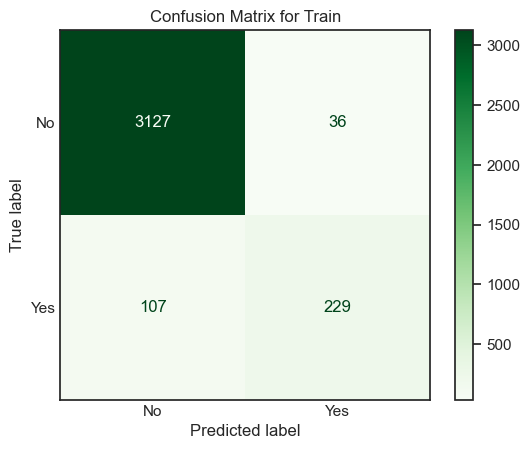

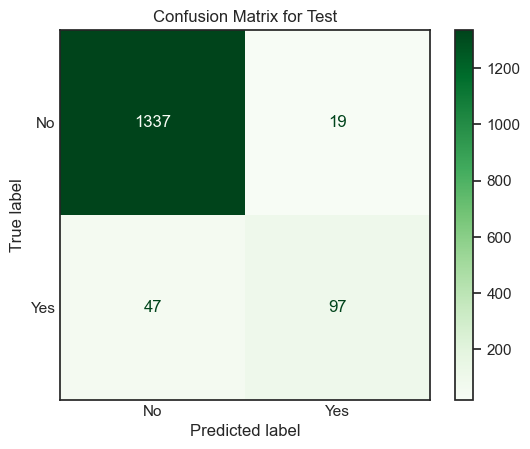

In [185]:
# Let's check model performances for this model

scores_statmodel = get_metrics_score(lg3,X_train3,X_test3,y_train,y_test,statmodel)
add_score_model(scores_statmodel)

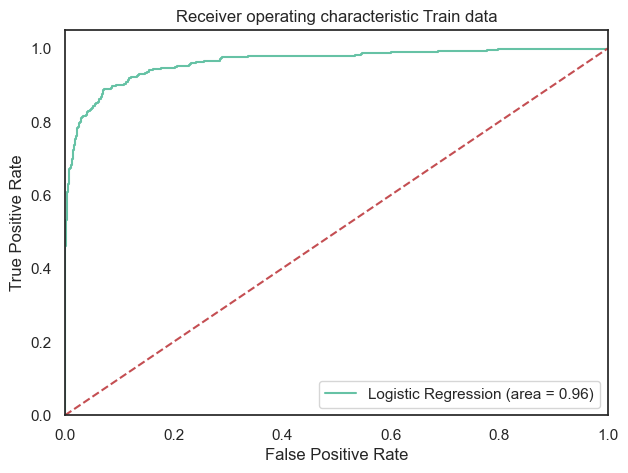

In [186]:
logit_roc_auc_train = roc_auc_score(y_train, lg3.predict(X_train3))
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train3))

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Train data')
plt.legend(loc="lower right")
plt.show()

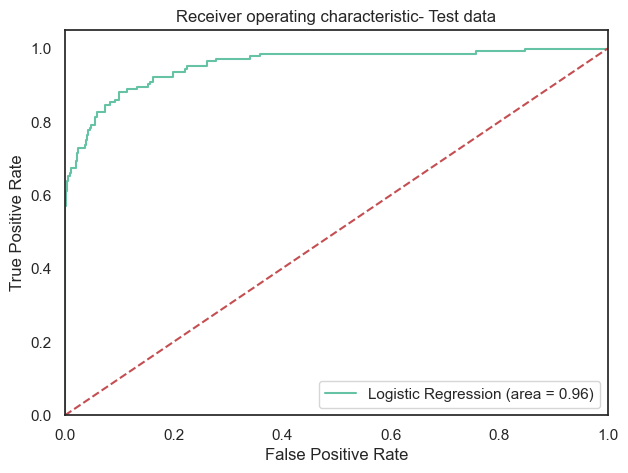

In [187]:
logit_roc_auc_test = roc_auc_score(y_test, lg3.predict(X_test3))
fpr, tpr, thresholds = roc_curve(y_test, lg3.predict(X_test3))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic- Test data')
plt.legend(loc="lower right")
plt.show()

Logistic Regression model is giving a generalized performance on training and test set.
ROC-AUC score of 0.96 on training and test set is quite good.

Coefficient interpretations
Coefficient of Income, Education, Family,CCavg,CD account,Age, are positive , ie a one unit increase in these will lead to increase in chances of a person borrowing loan
Coefficient of Securities account,online ,Credit card are negative, increase in these will lead to decrease in chances of a person borrowing a loan.
Converting coefficients to odds
The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.

Therefore, odds = exp(b)
Calculate the probability from the odds ratio using the formula probability = odds / (1+odds)
The percentage change in odds is given as odds = (exp(b) - 1) * 100

In [188]:
lg3.params

const               -5.173
Income               3.003
Family               0.769
CCAvg                0.179
SecuritiesAccount   -0.234
CDAccount            0.844
Online              -0.335
CreditCard          -0.385
Education_2          1.833
Education_3          1.951
dtype: float64

In [191]:
lgcoef= pd.DataFrame(lg3.params, columns=['coef'])
lgcoef

coef
const             -5.17
Income             3.00
Family             0.77
CCAvg              0.18
SecuritiesAccount -0.23
CDAccount          0.84
Online            -0.34
CreditCard        -0.39
Education_2        1.83
Education_3        1.95

In [192]:
lgcoef.loc[:, "Odds Ratio"] = np.exp(lgcoef.coef)
lgcoef

coef  Odds Ratio
const             -5.17        0.01
Income             3.00       20.14
Family             0.77        2.16
CCAvg              0.18        1.20
SecuritiesAccount -0.23        0.79
CDAccount          0.84        2.33
Online            -0.34        0.72
CreditCard        -0.39        0.68
Education_2        1.83        6.25
Education_3        1.95        7.04

In [193]:
#Calculate Odds Ratio, probability
##create a data frame to collate Odds ratio, probability and p-value of the coef


lgcoef['Probability'] = lgcoef['Odds Ratio']/(1+lgcoef['Odds Ratio'])


lgcoef['Percentage Change of Odds']=(np.exp(lg3.params)-1)*100

lgcoef['pval']=lg3.pvalues

pd.options.display.float_format = '{:.2f}'.format

lgcoef = lgcoef.sort_values(by="Odds Ratio", ascending=False)
lgcoef

coef  Odds Ratio  Probability  Percentage Change of Odds  \
Income             3.00       20.14         0.95                    1913.74   
Education_3        1.95        7.04         0.88                     603.79   
Education_2        1.83        6.25         0.86                     525.17   
CDAccount          0.84        2.33         0.70                     132.66   
Family             0.77        2.16         0.68                     115.78   
CCAvg              0.18        1.20         0.54                      19.63   
SecuritiesAccount -0.23        0.79         0.44                     -20.85   
Online            -0.34        0.72         0.42                     -28.50   
CreditCard        -0.39        0.68         0.40                     -31.98   
const             -5.17        0.01         0.01                     -99.43   

                   pval  
Income             0.00  
Education_3        0.00  
Education_2        0.00  
CDAccount          0.00  
Family             0.00  
CCAvg              0.05  
SecuritiesAccount  0.04  
Online             0.00  
CreditCard         0.00  
const              0.00

 MODEL PERFORMANCE
 Accuracy   : Train: 0.959  Test:  0.956
 Recall     : Train: 0.682  Test: 0.674
 Precision  : Train: 0.864  Test:  0.836
 F1         : Train: 0.762  Test: 0.746


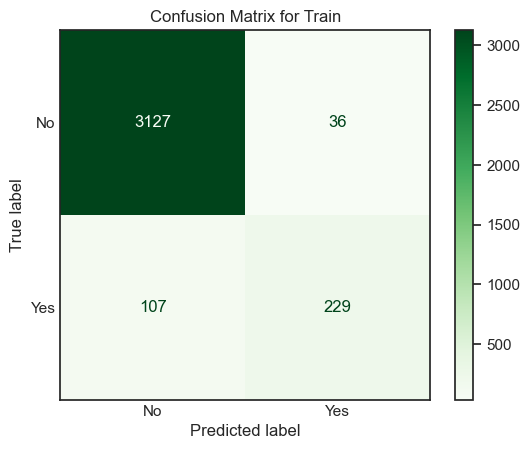

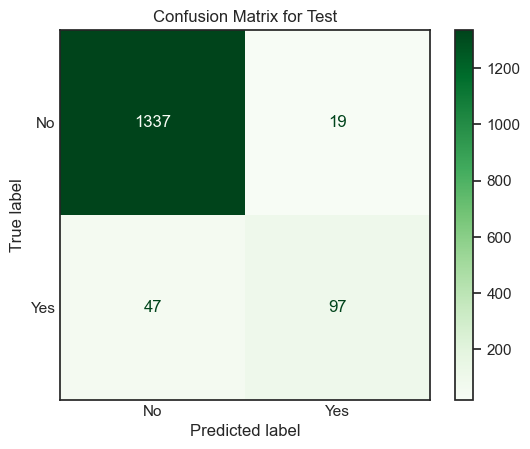

In [194]:
# Let's check model performances for this model
scores_LR = get_metrics_score(lg3,X_train3,X_test3,y_train,y_test,statmodel)

In [195]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
#fpr, tpr, thresholds = metrics.roc_curve(y_test, lg2.predict(X_test2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.09150126568446633


 MODEL PERFORMANCE
 Accuracy   : Train: 0.899  Test:  0.897
 Recall     : Train: 0.902  Test: 0.875
 Precision  : Train: 0.487  Test:  0.481
 F1         : Train: 0.633  Test: 0.621


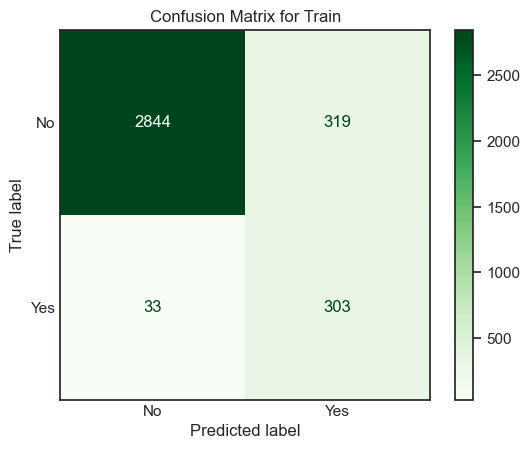

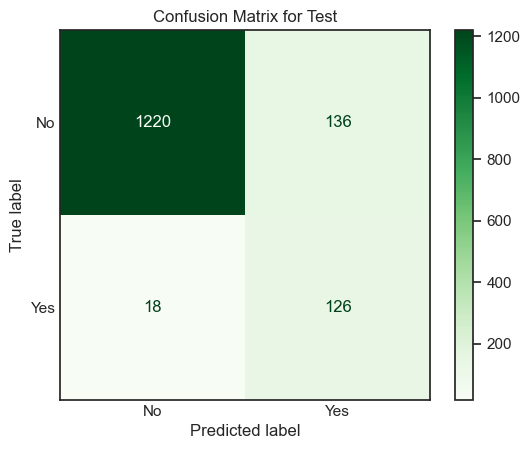

 ROC-AUC Score  :Train::  0.9  Test::  0.887


In [111]:
scores_statmodel = get_metrics_score(lg3,X_train3,X_test3,y_train,y_test,statmodel,threshold=optimal_threshold_auc_roc,roc=True)
add_score_model(scores_statmodel)

With 0.092 Threshold the Recall score has improved from 68% to 87% on test data with 89% accuracy. Also False negative values has decreased to 18 from 46 for testdat. ROC-AUC score is 88 which is good.

In [200]:
y_train.shape, y_scores.shape

((3499,), (3499,))

Let's use Precision-Recall curve and see if we can find a better threshold

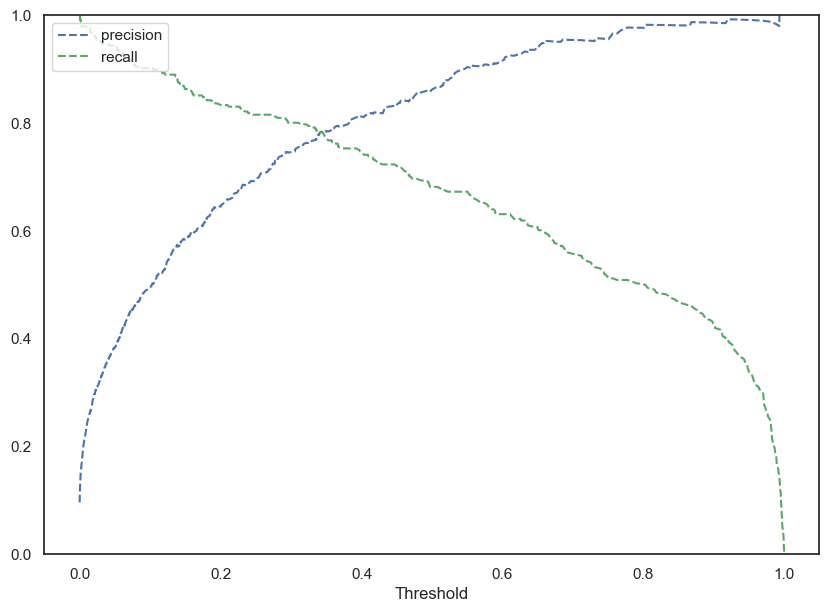

In [198]:
y_scores=lg3.predict(X_train3)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
plt.figure(figsize=(10,7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

 MODEL PERFORMANCE
 Accuracy   : Train: 0.955  Test:  0.945
 Recall     : Train: 0.801  Test: 0.729
 Precision  : Train: 0.747  Test:  0.705
 F1         : Train: 0.773  Test: 0.717


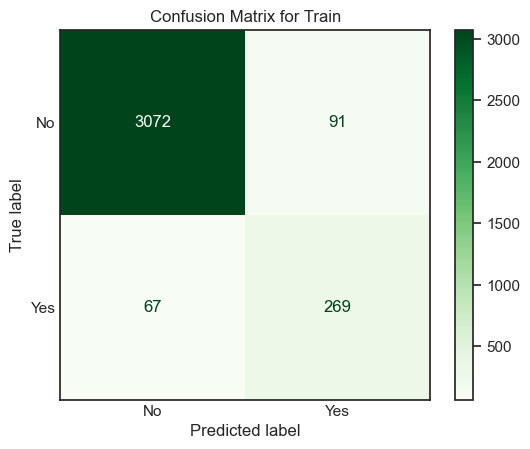

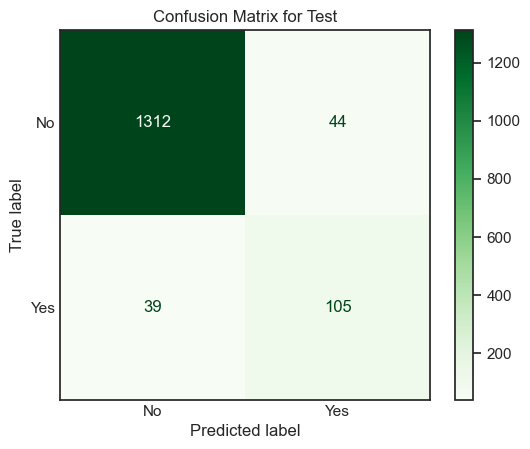

 ROC-AUC Score  :Train::  0.886  Test::  0.848


In [113]:
optimal_threshold_curve = 0.3

scores_opt_curve = get_metrics_score(lg3,X_train3,X_test3,y_train,y_test,statmodel,threshold=optimal_threshold_curve,roc=True)
add_score_model(scores_opt_curve)

With this model the False negative cases have gone up and recall for test is 72 with 95 % accuracy. Model is performing well on training and test set. Model has given a balanced performance, if the bank wishes to maintain a balance between recall and precision this model can be used. Area under the curve has decreased as compared to the initial model but the performance is generalized on training and test set.

# Using Sequential Feature Selection

In [114]:
X_train_seq=X_train_stat
X_test_seq=X_test_stat

In [1]:
#!pip install mlxtend

In [118]:
import mlxtend

In [119]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
#from sklearn.lin
X_train_seq.shape

(3499, 16)

In [120]:
statmodel=0  #0 for sklearn and 1 for statmodel

clf = LogisticRegression(solver='newton-cg',random_state=1,fit_intercept=False)
# Build step forward feature selection
sfs1 = sfs(clf,k_features = 16,forward=True,
           floating=False, scoring= 'recall',
           verbose=2,
           cv=5)

 # Perform SFFS
sfs1 = sfs1.fit(X_train_seq, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    2.2s finished

[2023-07-31 09:01:37] Features: 1/16 -- score: 0.9941176470588236[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.7s finished

[2023-07-31 09:01:39] Features: 2/16 -- score: 0.9970588235294118[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    2.0s finished

[2023-07-31 09:01:41] Features: 3/16 -- score: 0.9970588235294118[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [121]:
statmodel=0  #0 for sklearn and 1 for statmodel

clf = LogisticRegression(solver='newton-cg',random_state=1,fit_intercept=False)
# Build step forward feature selection
sfs1 = sfs(clf,k_features = 11,forward=True,
           floating=False, scoring= 'recall',
           verbose=2,
           cv=5)

 # Perform SFFS
sfs1 = sfs1.fit(X_train_seq, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    1.0s finished

[2023-07-31 09:01:56] Features: 1/11 -- score: 0.9941176470588236[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.9s finished

[2023-07-31 09:01:58] Features: 2/11 -- score: 0.9970588235294118[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    1.7s finished

[2023-07-31 09:02:00] Features: 3/11 -- score: 0.9970588235294118[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [122]:
# Now Which features are important?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[1, 2, 4, 5, 6, 8, 9, 10, 11, 13, 14]


In [123]:
X_train_seq.columns[feat_cols]

Index(['Age', 'Income', 'CCAvg', 'Mortgage', 'SecuritiesAccount', 'Online',
       'CreditCard', 'Regions_Central', 'Regions_Los Angeles Region',
       'Regions_Superior', 'Education_2'],
      dtype='object')

Now we will fit a sklearn model using these features only

In [124]:
X_train_final = X_train_seq[X_train_seq.columns[feat_cols]]
X_test_final = X_test_seq[X_train_final.columns]

 MODEL PERFORMANCE
 Accuracy   : Train: 0.677  Test:  0.686
 Recall     : Train: 0.997  Test: 0.972
 Precision  : Train: 0.229  Test:  0.231
 F1         : Train: 0.372  Test: 0.373


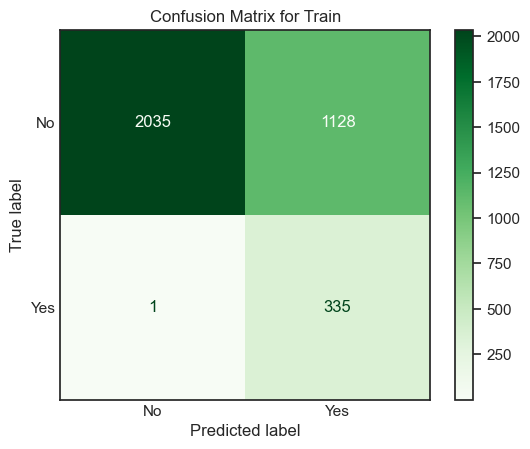

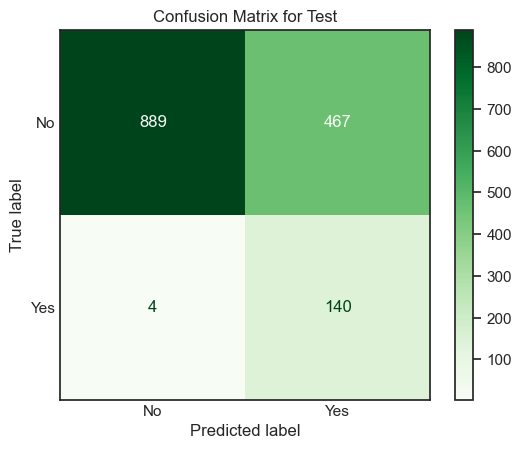

In [125]:
lr = LogisticRegression(solver='newton-cg',random_state=1,fit_intercept=False)
model  = lr.fit(X_train_final,y_train)

statmodel=0  #0 for sklearn and 1 for statmodel

# Let's check model performances for this model
scores_sfs = get_metrics_score(model,X_train_final,X_test_final,y_train,y_test,statmodel)
add_score_model(scores_sfs)

In [126]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression Model- Sklearn', 
                                          'Logistic Regression Model - Statsmodels',
                                          'Logistic Regression - Optimal threshold = 0.092',
                                          'Logistic Regression - Optimal threshold = 0.3',
                                          'Logistic Regression - Sequential feature selection'
                                          ],
                                          'Train_Accuracy':acc_train, 
                                          'Test_Accuracy':acc_test,
                                          'Train Recall':recall_train,
                                          'Test Recall':recall_test, 
                                          'Train Precision':precision_train,
                                          'Test Precision':precision_test,
                                          'Train F1':f1_train,
                                          'Test F1':f1_test
                                })
                                    
    
                                       

comparison_frame

Model  Train_Accuracy  \
0                  Logistic Regression Model- Sklearn            0.66   
1             Logistic Regression Model - Statsmodels            0.96   
2     Logistic Regression - Optimal threshold = 0.092            0.90   
3       Logistic Regression - Optimal threshold = 0.3            0.95   
4  Logistic Regression - Sequential feature selection            0.68   

   Test_Accuracy  Train Recall  Test Recall  Train Precision  Test Precision  \
0           0.65          0.98         0.99             0.22            0.21   
1           0.96          0.68         0.67             0.86            0.84   
2           0.90          0.90         0.88             0.49            0.48   
3           0.94          0.80         0.73             0.75            0.70   
4           0.69          1.00         0.97             0.23            0.23   

   Train F1  Test F1  
0      0.35     0.35  
1      0.76     0.75  
2      0.63     0.62  
3      0.77     0.72  
4      0.37     0.37

Since we want higher Recall with higher accuracy Optimal Threshold 0.3 seems to be a good choice. Lets explore a model with decison tree if this score can be improved further.

In [127]:
#drop column which we don't need for modelling
df_Decision.drop(columns=["Agebin", "ZIPCode","County",'Experience','Income_group','Spending_group'], inplace=True)

In [128]:
X_dt = df_Decision.drop('PersonalLoan', axis=1)
y_dt = df_Decision['PersonalLoan']

In [129]:
#oneHotCols=['Regions']
oneHotCols=X_dt.select_dtypes(exclude='number').columns.to_list()
X_dt=pd.get_dummies(X_dt,columns=oneHotCols,drop_first=True)
# Spliting data set
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.3, random_state=1, stratify=y_dt)

In [130]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    ytrain_predict = model.predict(X_train_dt)
    ytest_predict = model.predict(X_test_dt)
    # accuracy on training set
    print("\x1b[0;30;47m \033[1mAccuracy : Train :\033[0m", 
          model.score(X_train_dt,y_train_dt),
          "\x1b[0;30;47m \033[1mTest:\033[0m", 
          model.score(X_test_dt,y_test_dt))
# accuracy on training set
    print("\x1b[0;30;47m \033[1mRecall   : Train :\033[0m", 
          metrics.recall_score(y_train_dt,ytrain_predict),
          "\x1b[0;30;47m \033[1mTest:\033[0m", 
          metrics.recall_score(y_test_dt,ytest_predict))
    make_confusion_matrix(y_train_dt,ytrain_predict,"Confusion Matric on Train Data")
    make_confusion_matrix(y_test_dt,ytest_predict,"Confusion Matric on Test Data")

 Accuracy : Train : 1.0  Test: 0.984
 Recall   : Train : 1.0  Test: 0.9027777777777778


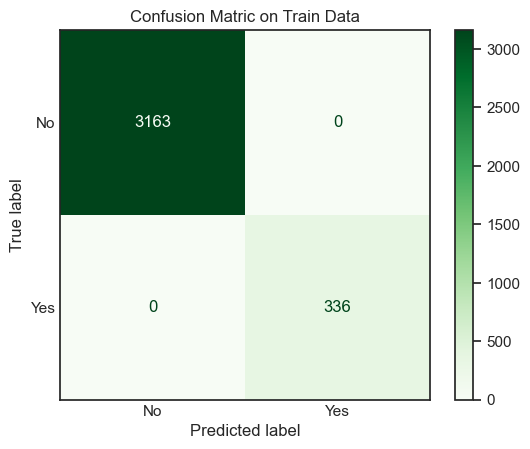

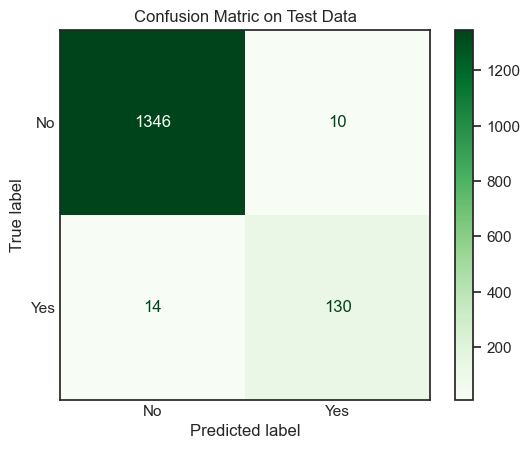

In [131]:
#since data is imbalanced adding weights
model = DecisionTreeClassifier(criterion = 'gini',class_weight={0:0.15,1:0.85}, random_state=1)
model.fit(X_train_dt, y_train_dt)
get_recall_score(model)

Decision tree tends to Overfit and the disparity between the Recall on Train and Test suggest that the model is overfitted

In [132]:
column_names = list(X_dt.columns)
feature_names = column_names
print(feature_names)

['Age', 'Income', 'CCAvg', 'Mortgage', 'Family_2', 'Family_3', 'Family_4', 'Education_2', 'Education_3', 'SecuritiesAccount_1', 'CDAccount_1', 'Online_1', 'CreditCard_1', 'Regions_Central', 'Regions_Los Angeles Region', 'Regions_Southern', 'Regions_Superior']


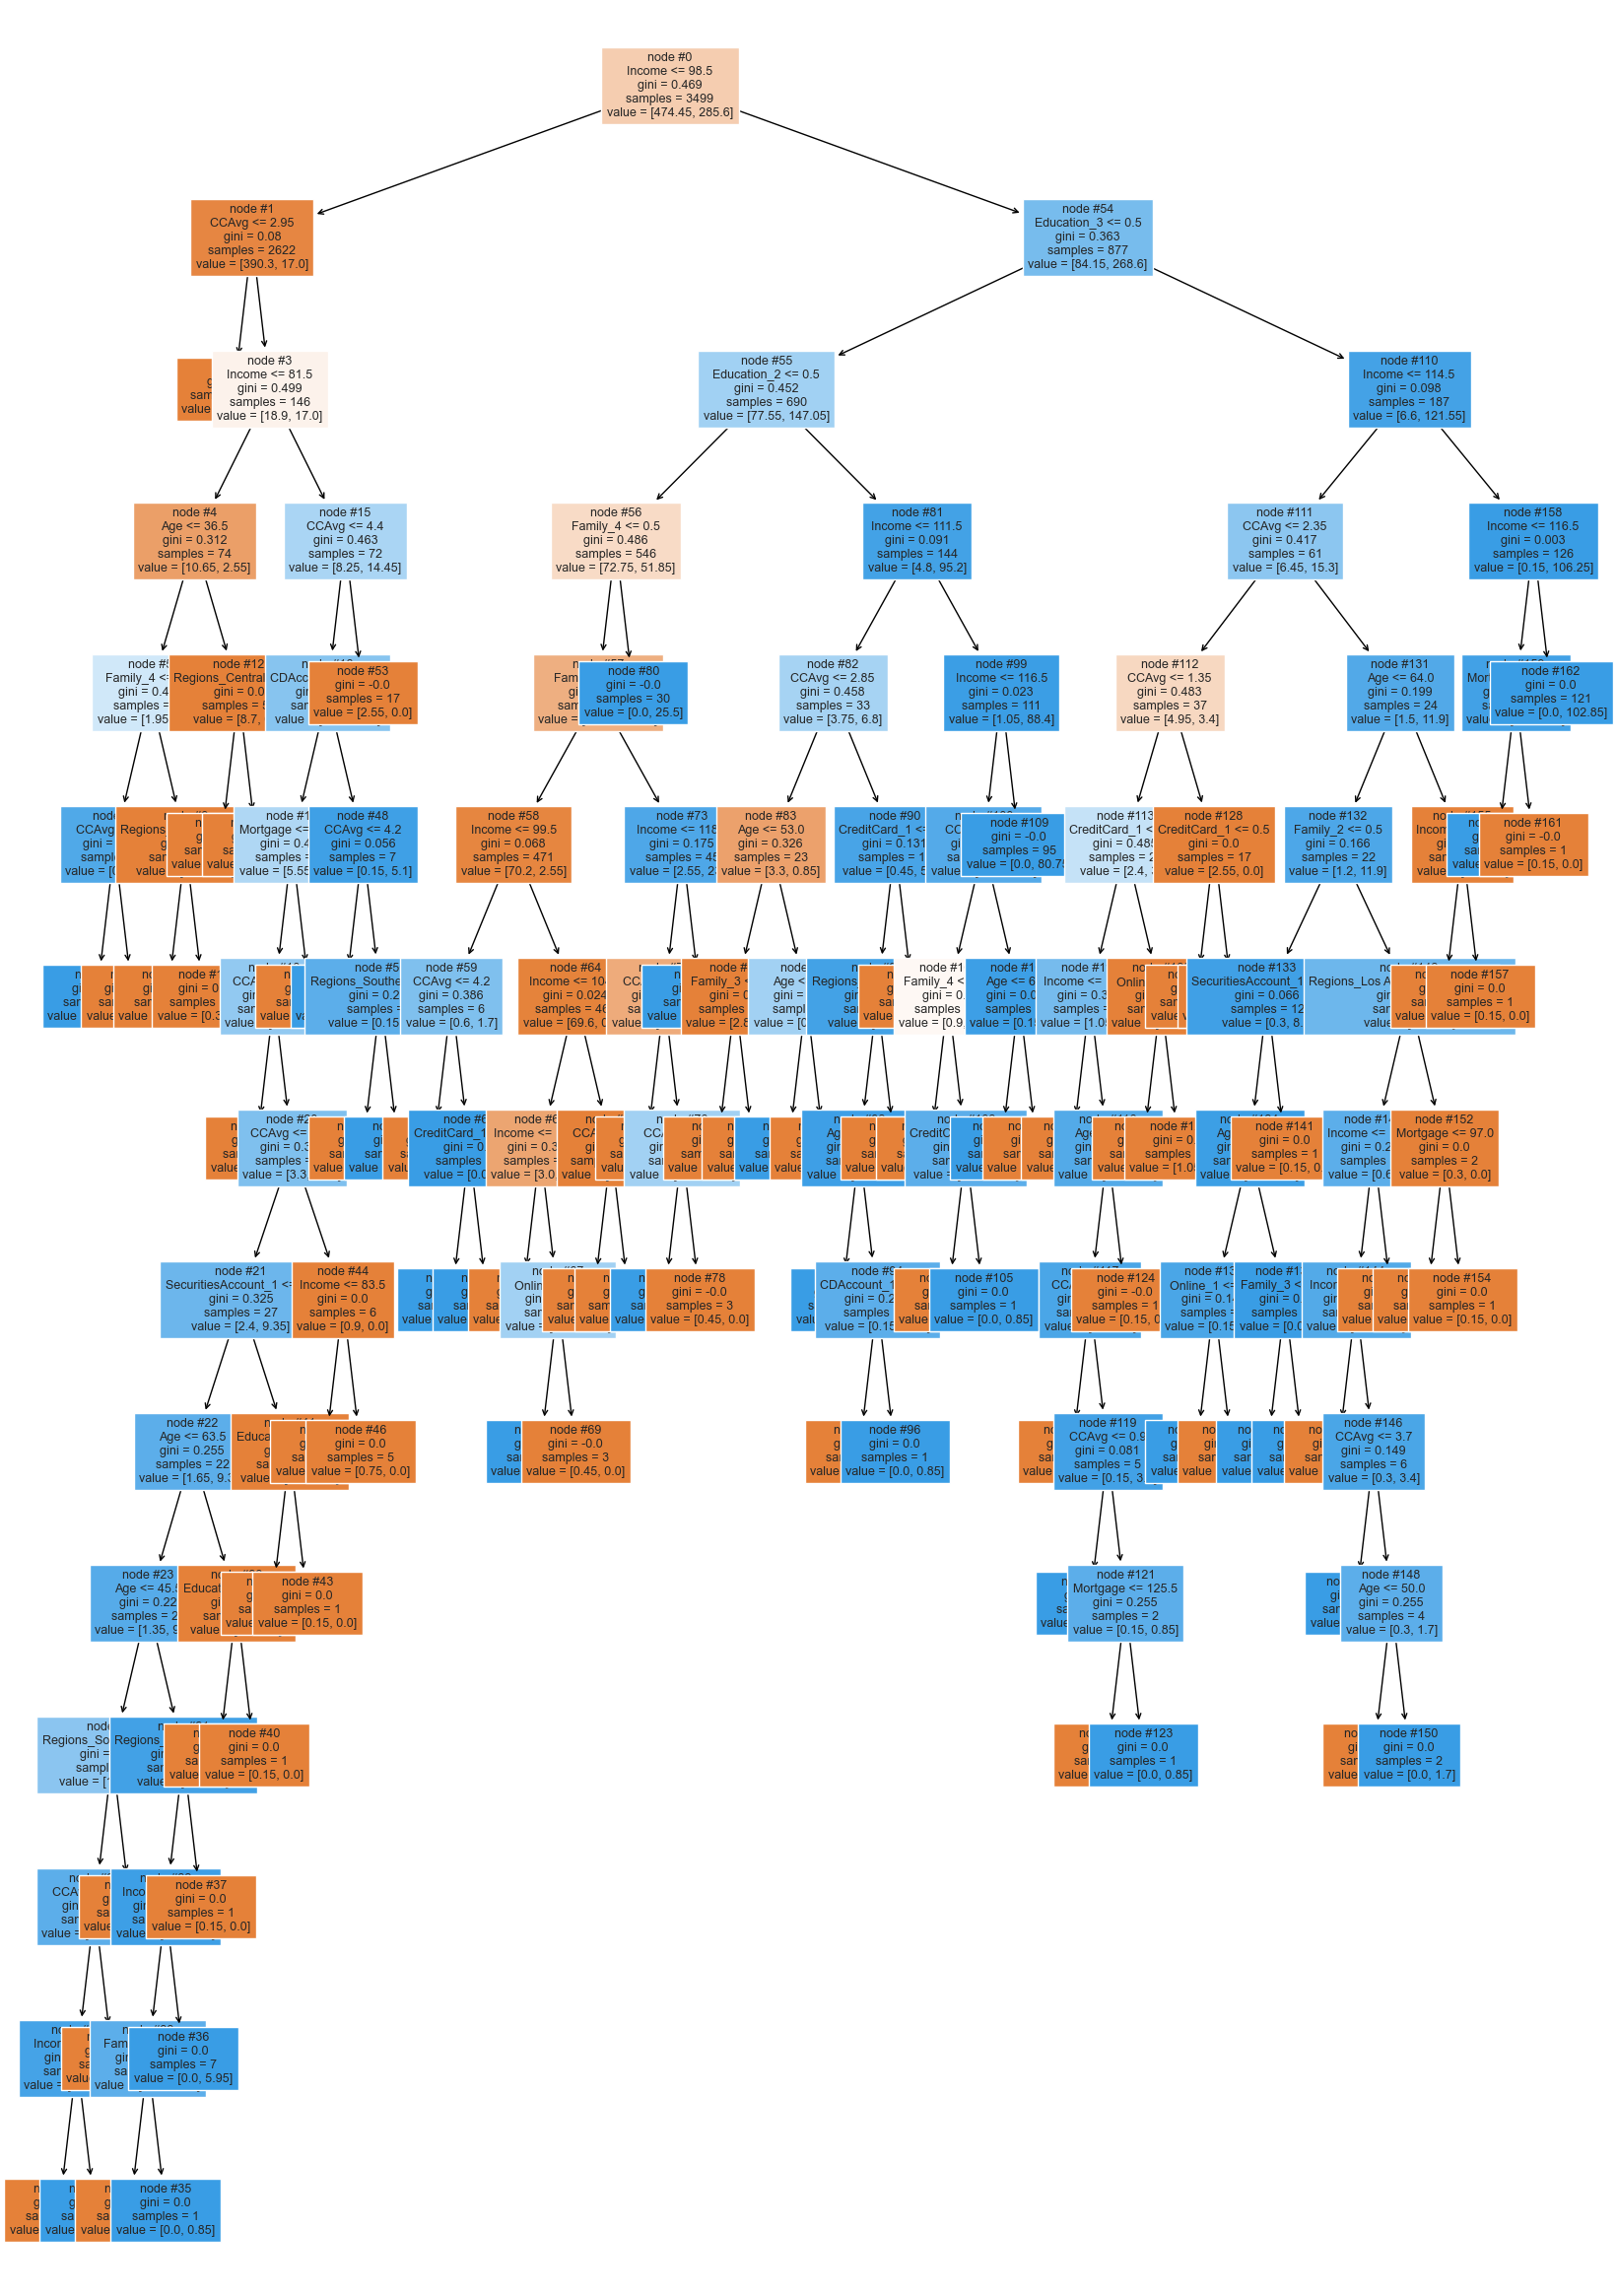

In [134]:
plt.figure(figsize=(20,30))
from sklearn import tree
from sklearn.model_selection import GridSearchCV
out = tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [135]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [371.40, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 81.50
|   |   |   |--- Age <= 36.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- CCAvg <= 3.50
|   |   |   |   |   |   |--- weights: [0.00, 2.55] class: 1
|   |   |   |   |   |--- CCAvg >  3.50
|   |   |   |   |   |   |--- weights: [0.30, 0.00] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- Regions_Central <= 0.50
|   |   |   |   |   |   |--- weights: [1.35, 0.00] class: 0
|   |   |   |   |   |--- Regions_Central >  0.50
|   |   |   |   |   |   |--- weights: [0.30, 0.00] class: 0
|   |   |   |--- Age >  36.50
|   |   |   |   |--- Regions_Central <= 0.50
|   |   |   |   |   |--- weights: [8.25, 0.00] class: 0
|   |   |   |   |--- Regions_Central >  0.50
|   |   |   |   |   |--- weights: [0.45, 0.00] class: 0
|   |   |--- Income >  81.50
|   |   |   |--- CCAvg <= 4.40
|   |   |   |   |--- CDAccount_1 <= 0.50
|  

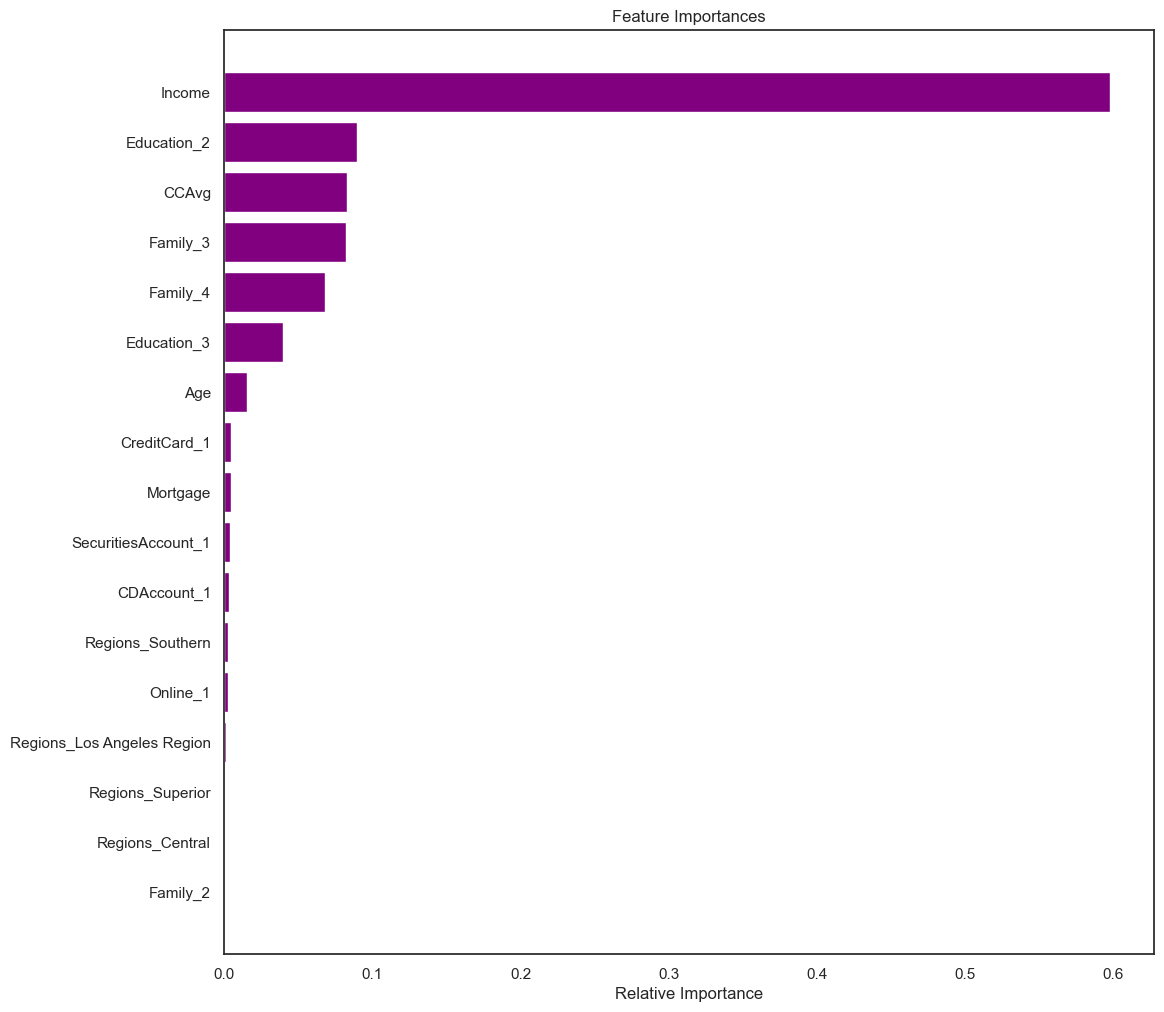

In [136]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [139]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)
# Grid of parameters to choose from

parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [5, 10,15,20,25,30],
              }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_dt, y_train_dt)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_
estimator

DecisionTreeClassifier(max_depth=9, max_leaf_nodes=30, min_samples_leaf=2,
                       random_state=1)

In [140]:
# Fit the best algorithm to the data. 
estimator.fit(X_train_dt, y_train_dt)
ytrain_predict=estimator.predict(X_train_dt)
ytest_predict=estimator.predict(X_test_dt)

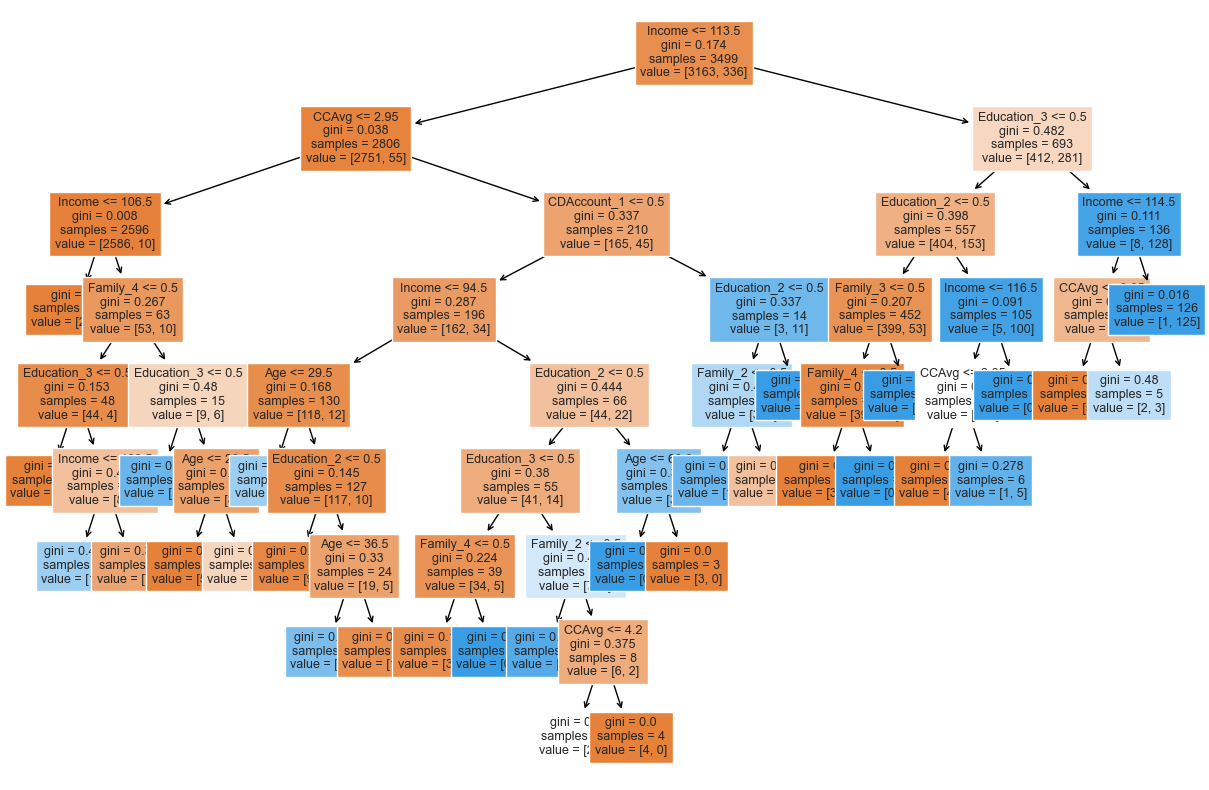

In [141]:
plt.figure(figsize=(15,10))

out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=False)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

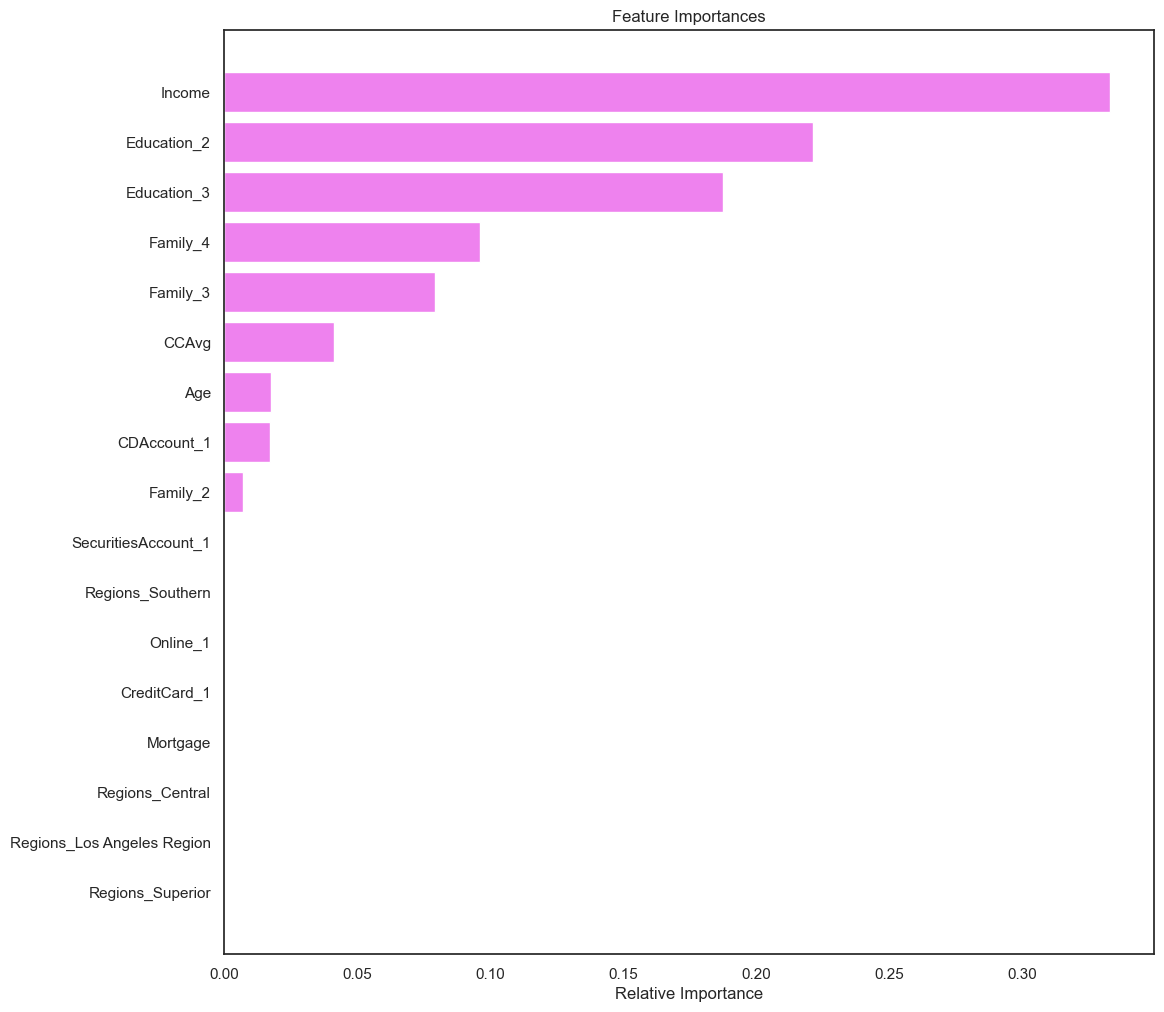

In [142]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

 Accuracy : Train : 0.992283509574164  Test: 0.984
 Recall   : Train : 0.9494047619047619  Test: 0.9166666666666666


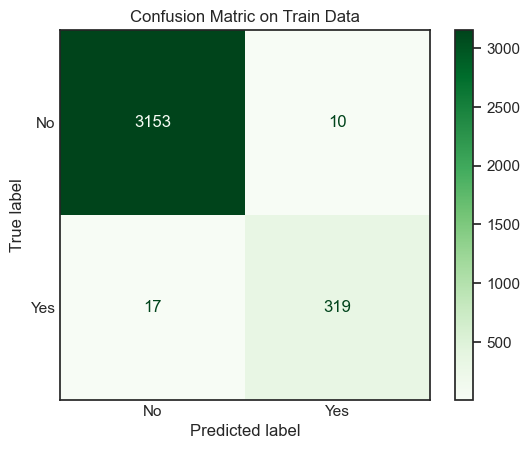

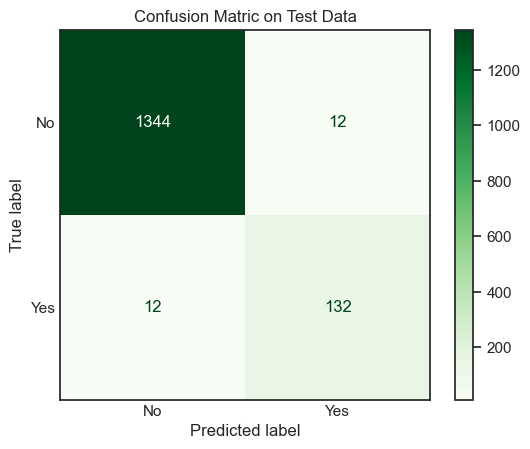

In [143]:
get_recall_score(estimator)

With HyperParameter max_depth=6, max_leaf_nodes=20, min_samples_leaf=7 the overfitting on train has reduced, but the recall for test has not improved.

Important features are Income,Education 2 and Education 3, Family 4, Family 3, CCavg & Age.

But the recall metric is still 91 and false negatives are 12.

We don't want to loose opportunity in predicting this customers. so Let see if instead of pre pruning , post pruning helps in reducing false negative.

Top Down Approach  - external constraints - tree stops as and when any one of the constraints is reached

Bottom Up Approach - Allow the tree grow till full depth... later prune off some of the branches of the tree which are not needed

# Cost Complexity Pruning

In [144]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train_dt, y_train_dt)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

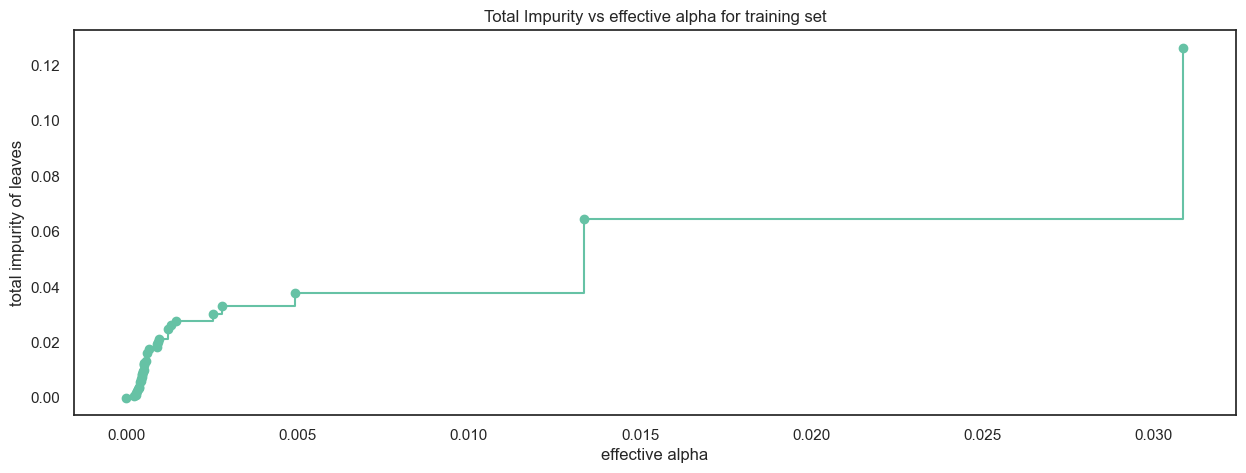

In [145]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. We will set these values of alpha and pass it to the ccp_alpha parameter of our DecisionTreeClassifier. By looping over the alphas array, we will find the accuracy on both Train and Test parts of our dataset.

In [146]:
clfs = []
accuracy_train=[]
accuracy_test=[]
recall_train=[]
recall_test=[]
for ccp_alpha in ccp_alphas:
    
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha,class_weight = {0:0.15,1:0.85})
    clf.fit(X_train_dt, y_train_dt)
    
    y_train_pred=clf.predict(X_train_dt)
    y_test_pred=clf.predict(X_test_dt)
    
    accuracy_train.append(clf.score(X_train_dt,y_train_dt))
    accuracy_test.append(clf.score(X_test_dt,y_test_dt))
    
    recall_train.append(metrics.recall_score(y_train_dt,y_train_pred))
    recall_test.append(metrics.recall_score(y_test_dt,y_test_pred))
    
    clfs.append(clf)

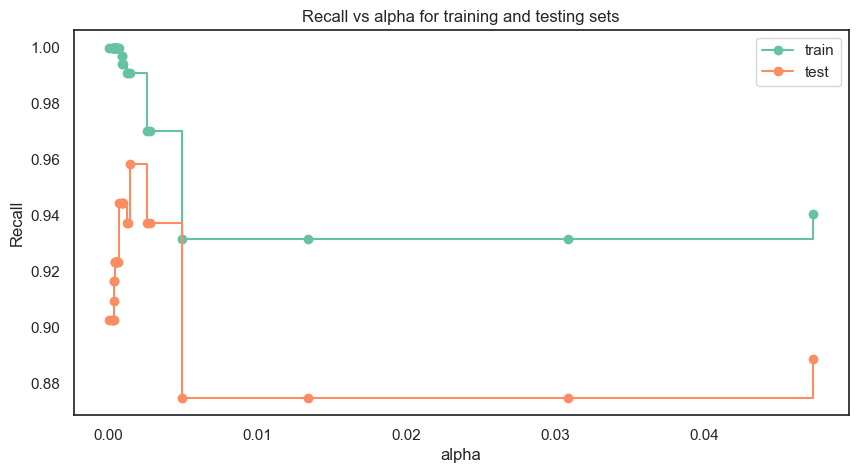

In [147]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

We are gettingt a higher recall on test data between 0.002 to 0.005. Will choose alpha as 0.002.

Creating model with 0.002 ccp_alpha

In [148]:
best_model = DecisionTreeClassifier(ccp_alpha=0.002,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)
best_model.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(ccp_alpha=0.002, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

 Accuracy : Train : 0.9794226921977708  Test: 0.9753333333333334
 Recall   : Train : 0.9791666666666666  Test: 0.9583333333333334


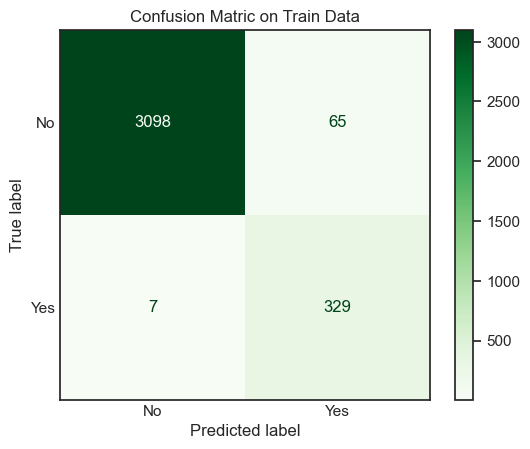

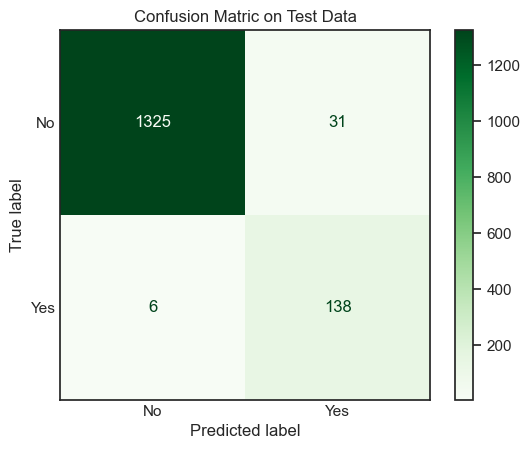

In [149]:
get_recall_score(best_model)

The Recall on train and test indicate we have created a generalized model. with 96 % accuracy and reduced False negatives.

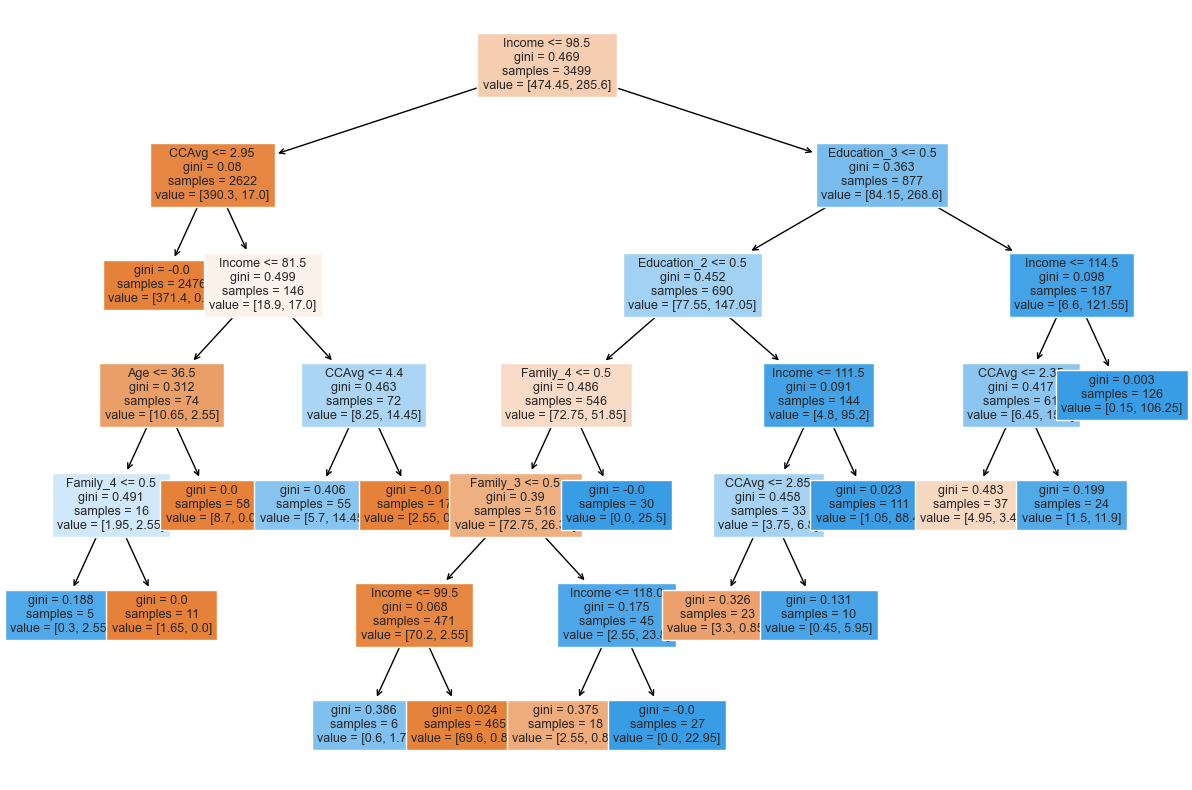

In [151]:
plt.figure(figsize=(15,10))

out = tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [152]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model,feature_names=feature_names,show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [371.40, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 81.50
|   |   |   |--- Age <= 36.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- weights: [0.30, 2.55] class: 1
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [1.65, 0.00] class: 0
|   |   |   |--- Age >  36.50
|   |   |   |   |--- weights: [8.70, 0.00] class: 0
|   |   |--- Income >  81.50
|   |   |   |--- CCAvg <= 4.40
|   |   |   |   |--- weights: [5.70, 14.45] class: 1
|   |   |   |--- CCAvg >  4.40
|   |   |   |   |--- weights: [2.55, 0.00] class: 0
|--- Income >  98.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_4 <= 0.50
|   |   |   |   |--- Family_3 <= 0.50
|   |   |   |   |   |--- Income <= 99.50
|   |   |   |   |   |   |--- weights: [0.60, 1.70] class: 1
|   |   |   |   |   |--- Income >  99.50
|   |   |   |   |   |   |--- weights: [69.60, 0.85] class: 0
|   

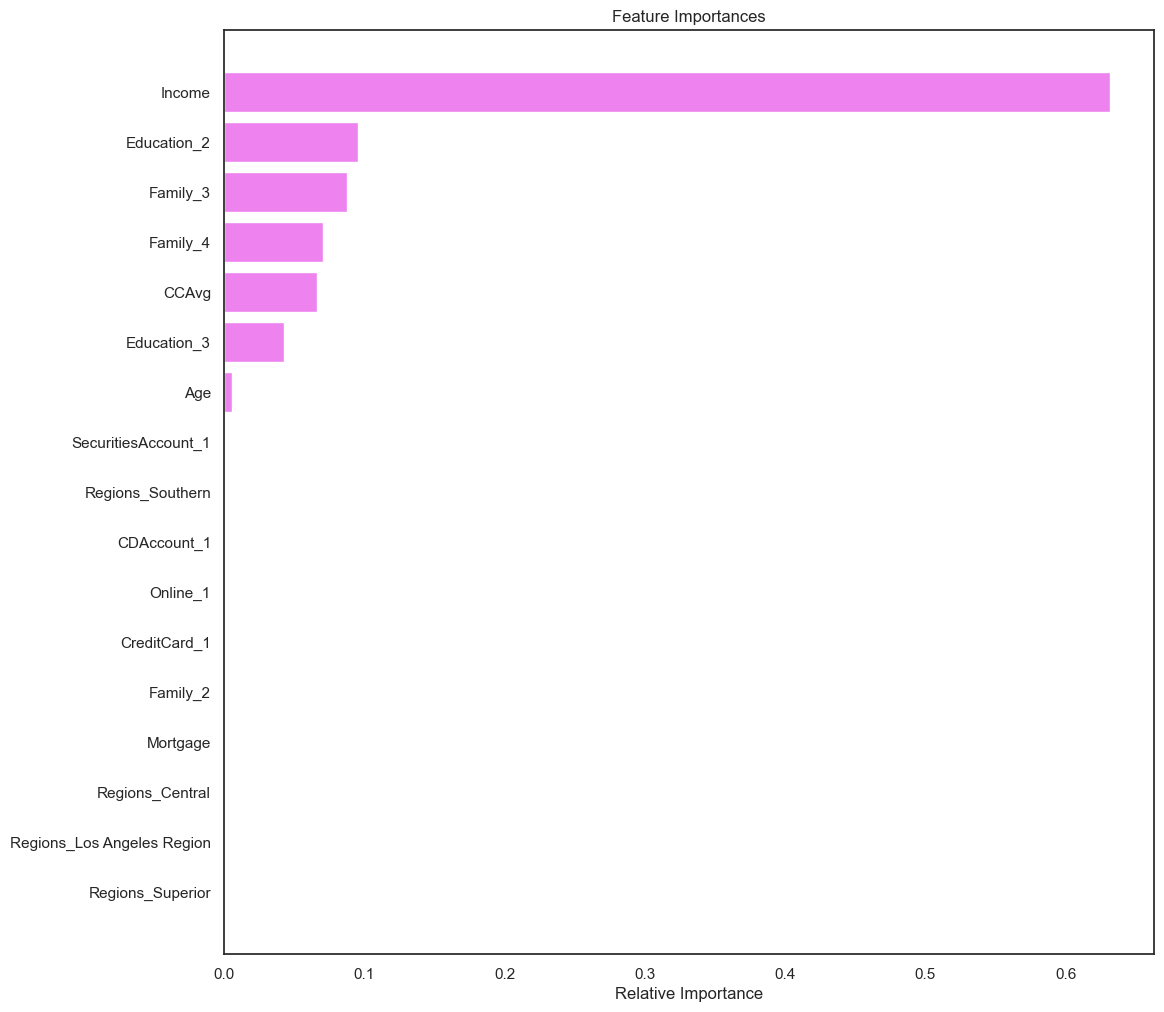

In [153]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

We are getting a higher recall on test data between 0.002 to 0.005. Will choosed alpha as 0.002.

The Recall on train and test indicate we have created a generalized model. with 96 % accuracy and reduced False negatives.

Important features : Income, Graduate education, Family member 3 and 4, Ccavg, Advanced education, Age.

This is the best model as false negative is only 6 on Testdata.

# Comparing all the models based on Model Performance

In [154]:
comparison_frame = pd.DataFrame({'Model':['Logisitic Regression with Optimal Threshold 0.104',
                                          'Initial decision tree model',
                                          'Decision treee with hyperparameter tuning',
                                          'Decision tree with post-pruning'], 
                                          'Train_accuracy':[0.92,1,0.99,0.98],
                                          'Test_accuracy':[0.91,0.98,0.98,0.97],
                                          'Train_Recall':[0.90,1,0.92,0.98], 
                                          'Test_Recall':[0.88,0.86,0.84,0.96]})  

comparison_frame

Model  Train_accuracy  \
0  Logisitic Regression with Optimal Threshold 0.104            0.92   
1                        Initial decision tree model            1.00   
2          Decision treee with hyperparameter tuning            0.99   
3                    Decision tree with post-pruning            0.98   

   Test_accuracy  Train_Recall  Test_Recall  
0           0.91          0.90         0.88  
1           0.98          1.00         0.86  
2           0.98          0.92         0.84  
3           0.97          0.98         0.96

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1356
           1       0.82      0.96      0.88       144

    accuracy                           0.98      1500
   macro avg       0.91      0.97      0.93      1500
weighted avg       0.98      0.98      0.98      1500



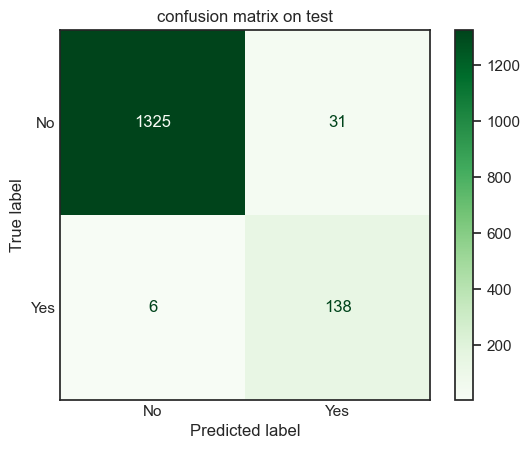

In [155]:
y_pred = best_model.predict(X_test_dt)
print(classification_report(y_test_dt,y_pred))
make_confusion_matrix(y_test,y_pred,"confusion matrix on test")

Observation

After Post Pruning ,the false negative has reduced to 6.The accuracy on test data is 97% & Recall is 97% after choosing optimal cc-alpha.

In [ ]:
xtrain/xtest

income,age,.....

model.preditct([income,age,])

# Actionable Insights & Recommendations

Misclassification Analysis

In [156]:
misclass_df = X_test_dt.copy()


In [157]:
misclass_df['Actual']=y_test_dt
misclass_df['Predicted'] = y_pred

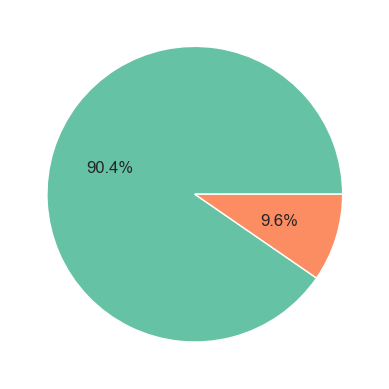

In [158]:
plt.pie(data=misclass_df,x=misclass_df["Actual"].value_counts(),autopct='%1.1f%%')
plt.show()

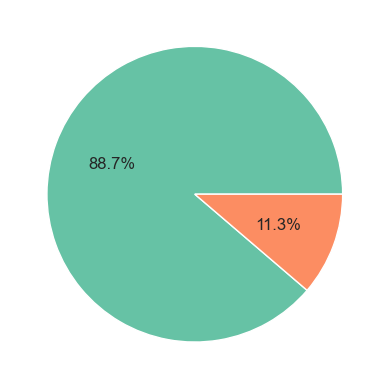

In [159]:
plt.pie(data=misclass_df,x=misclass_df["Predicted"].value_counts(),autopct='%1.1f%%')
plt.show()

Percentage of value predicted by our model has been very close to the actual values. Lets find out False Negative and False Positive observations

In [162]:
# Rows that were classified as Negative when they were actually positive
fn_rows = misclass_df[(misclass_df['Actual'] == 1) & (misclass_df['Predicted'] == 0)]

In [163]:
False_negative= df_Decision[df_Decision.index.isin(fn_rows.index.values)].copy()
False_negative

Age  Income Family  CCAvg Education  Mortgage PersonalLoan  \
322    63     101      1   3.90         1         0            1   
1069   44      75      2   3.50         1         0            1   
1518   43      64      4   3.00         3       221            1   
2533   54     111      1   1.10         2         0            1   
2623   42     111      3   3.00         1         0            1   
2996   42     103      1   3.33         1         0            1   

     SecuritiesAccount CDAccount Online CreditCard             Regions  
322                  1         1      1          0            Southern  
1069                 0         0      1          0  Los Angeles Region  
1518                 0         0      1          0            Bay Area  
2533                 0         0      1          0            Southern  
2623                 1         1      0          1            Bay Area  
2996                 1         1      1          1  Los Angeles Region

Our model predicted 6 customers wrongly. On analyzing the Income , Education,Family , we can see the income is not in range of High income group and education is undergrad for most of them and there average spending is also low. These cases are some exceptions.

In [164]:
# Rows that were classified as postive when they were actually negative
fp_rows = misclass_df[(misclass_df['Actual'] == 0) & (misclass_df['Predicted'] == 1)]
fp_rows
False_Positive= df_Decision[df_Decision.index.isin(fp_rows.index.values)].copy()
False_Positive

Age  Income Family  CCAvg Education  Mortgage PersonalLoan  \
10     65     105      4   2.40         3         0            0   
82     41      82      1   4.00         3         0            0   
185    39     115      1   1.00         3         0            0   
621    41     114      2   1.80         2         0            0   
640    43      85      1   3.70         3       327            0   
683    40      82      1   3.60         2         0            0   
731    28      90      2   3.30         1         0            0   
746    62      85      4   3.40         2         0            0   
792    41      98      1   4.00         3         0            0   
932    51     112      3   1.80         2         0            0   
950    32     112      4   1.80         2         0            0   
973    43      85      1   4.00         3       287            0   
986    53     101      4   4.90         1         0            0   
1263   35      85      4   4.00         3         0            0   
1303   29     112      2   2.00         2       382            0   
1401   40      84      1   3.70         3         0            0   
1910   43      83      2   3.80         3       112            0   
2437   65     114      4   3.40         2         0            0   
3064   59      83      3   4.40         1         0            0   
3081   36      78      2   4.50         3       204            0   
3263   32      84      4   3.40         1         0            0   
3322   41     104      1   4.00         3         0            0   
3409   29     113      2   2.00         2        84            0   
3468   43     113      2   1.80         2         0            0   
3754   63     112      4   2.40         3         0            0   
4419   42      85      1   3.70         3       272            0   
4492   56      91      1   3.00         3         0            0   
4570   32      99      2   4.50         3       249            0   
4671   39     104      1   4.00         3         0            0   
4678   33     115      1   2.70         2       283            0   
4815   58      99      2   1.40         1         0            0   

     SecuritiesAccount CDAccount Online CreditCard             Regions  
10                   0         0      0          0            Bay Area  
82                   0         0      1          0            Southern  
185                  0         0      1          0            Southern  
621                  0         0      1          0  Los Angeles Region  
640                  1         0      1          0            Bay Area  
683                  0         0      0          0  Los Angeles Region  
731                  0         0      1          1  Los Angeles Region  
746                  0         0      1          0            Bay Area  
792                  0         0      0          1            Southern  
932                  1         1      1          1            Bay Area  
950                  0         0      1          0            Bay Area  
973                  0         0      1          0            Southern  
986                  0         0      1          0  Los Angeles Region  
1263                 0         0      1          0            Southern  
1303                 1         0      0          0            Bay Area  
1401                 0         0      1          0            Bay Area  
1910                 0         0      0          0             Central  
2437                 0         0      0          1            Bay Area  
3064                 0         0      1          0            Bay Area  
3081                 0         0      1          1            Bay Area  
3263                 0         0      1          0            Southern  
3322                 0         1      1          1            Southern  
3409                 0         0      1          1             Central  
3468                 0         0      0          1            Bay Area  
3754

On analyzing the Education , we can see most of them have education as Advance or Graduate . These cases are some exceptions.

Recommendation

Decision trees doesn't require to much data preparation or handling of outliers like logistic regression. 
They are easy to understand. 
Decision tress can easily overfit , so we have to be careful using decision tree.
Based on EDA, logistic Regression , Decision tree , Income ,Educatoin,Family,CCavg are most important factor.

Customers who have income above 98k dollars , Advance/graduate level education, a family of more than 2, such customers have higher chances of taking personal loans.

So for this campaign we can have different profiles for customers.

High Profile Clients :-Higher income,Advanced/Graduate level education, 3 /4 Family members,high spending

Average Profile :- Medium income group,Graduate level education.3/4Family members,medium spending

Low Profile:-Lower income group,undergrads ,3/4Family Member,low spending

Customer Average Spending and Mortages can also be looked upon as based on EDA and logistic Regression this parameters also play some role in likelihood of buy loan.

We can 1st target high profile customers , by providing them with a personal relationship managers who can address there concerns and can pursue them to buy loan from the bank with completive interest rates.

Prequalifying for Loan can also attract more customers.

Our 2nd target would be Medium profile customers.

The model cannot identify well if there are some exceptional cases when low profile customer is ready to buy a personal loan.